# Preprocess data and apply time series ML


In [1]:
%reload_ext autoreload
# for auto reloading modules without kernel restart
# If this does not work to import custom modules, then restart kernel

In [2]:
# increase default window size for notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\s.kaiser\AppData\Local\Temp\ipykernel_24732\696421802.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import timeit
from datetime import timedelta
from dataclasses import dataclass       # C like structure
import glob                             # finds all the pathnames matching specified pattern
import datetime as dt
import random
!python --version
print('pandas version: ' + pd.__version__)
print('numpy version: ' + np.__version__)

Python 3.9.7
pandas version: 1.4.2
numpy version: 1.21.5


In [4]:
import sys, os
cwd = sys.path[0]
sys.path.append(os.path.join(cwd, 'my_modules'))                # sys.path[0] is dir of the ipynb file
import custom_plot
import data_clean
import data_preprocess
import constants

imported custom_plot.py
data_clean imported
data_preprocess imported


In [5]:
%matplotlib notebook
# Plot related packages,%matplotlib notebook makes plots in jupyter interactive
# constants for plotting
x_label_elapsedtime = 0
x_label_datetime = 1

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
import seaborn as sns

### Load processed time series static-dynamic-static cycle samples with cell IDs
It is a list of valid charge/discharge/dynamic cycles with static voltage in the beginning and end

In [7]:
# Save list as pkl checkpoint
import pickle
    
# load last saved df and convert time stamp and sort
dir_path = os.path.join(cwd, 'csv')
src_path = os.path.join(dir_path, 'li_ts_valid_cycles_with_cellID.pkl')

with open(src_path, 'rb') as f:
    li_ts_cycles = pickle.load(f)

In [8]:
print(li_ts_cycles)

[                  timestamp       V  current  Temp
1096325 2022-01-18 13:02:17  4.1430      0.0  12.0
1096326 2022-01-18 13:02:18  4.1400      0.0  13.0
965787  2022-01-18 13:02:19  4.1400      0.0  13.0
965788  2022-01-18 13:02:20  4.1400      0.0  13.0
965789  2022-01-18 13:02:21  4.1400      0.0  13.0
...                     ...     ...      ...   ...
966664  2022-01-18 13:16:56  4.0810      0.0  13.0
966665  2022-01-18 13:16:57  4.0810      0.0  13.0
1097206 2022-01-18 13:16:58  4.0810      0.0  13.0
1097207 2022-01-18 13:16:59  4.0811      0.0  13.0
1097208 2022-01-18 13:17:00  4.0811      0.0  13.0

[884 rows x 4 columns],                  timestamp       V  current   Temp
695111 2022-02-22 22:32:06  4.1432      0.0  14.25
695112 2022-02-22 22:32:07  4.1432      0.0  14.25
695113 2022-02-22 22:32:08  4.1432      0.0  14.25
695114 2022-02-22 22:32:09  4.1432      0.0  14.25
695115 2022-02-22 22:32:10  4.1432      0.0  14.25
...                    ...     ...      ...    ...
69659

In [9]:
li_V1 = []
for df_x in li_ts_cycles:    
    # Take one cell data to avoid time overlap
    if 'V1' in df_x:
        li_V1.append(df_x)

In [11]:
# print(li_ts_cycles[0])
# print(len(li_ts_cycles))
# li_V1

In [12]:
# len(li_ts_cycles)
print(len(li_V1))

22


In [13]:
# Save CSV for Ram
dir_path = os.path.join(cwd, 'csv')
src_path = os.path.join(dir_path, 'cycle_sample.csv')
li_ts_cycles[3].to_csv(src_path)

In [14]:
# Take one cell data to avoid time overlap
for df_x in li_V1:
    print(df_x['timestamp'].is_monotonic_increasing)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


<IPython.core.display.Javascript object>


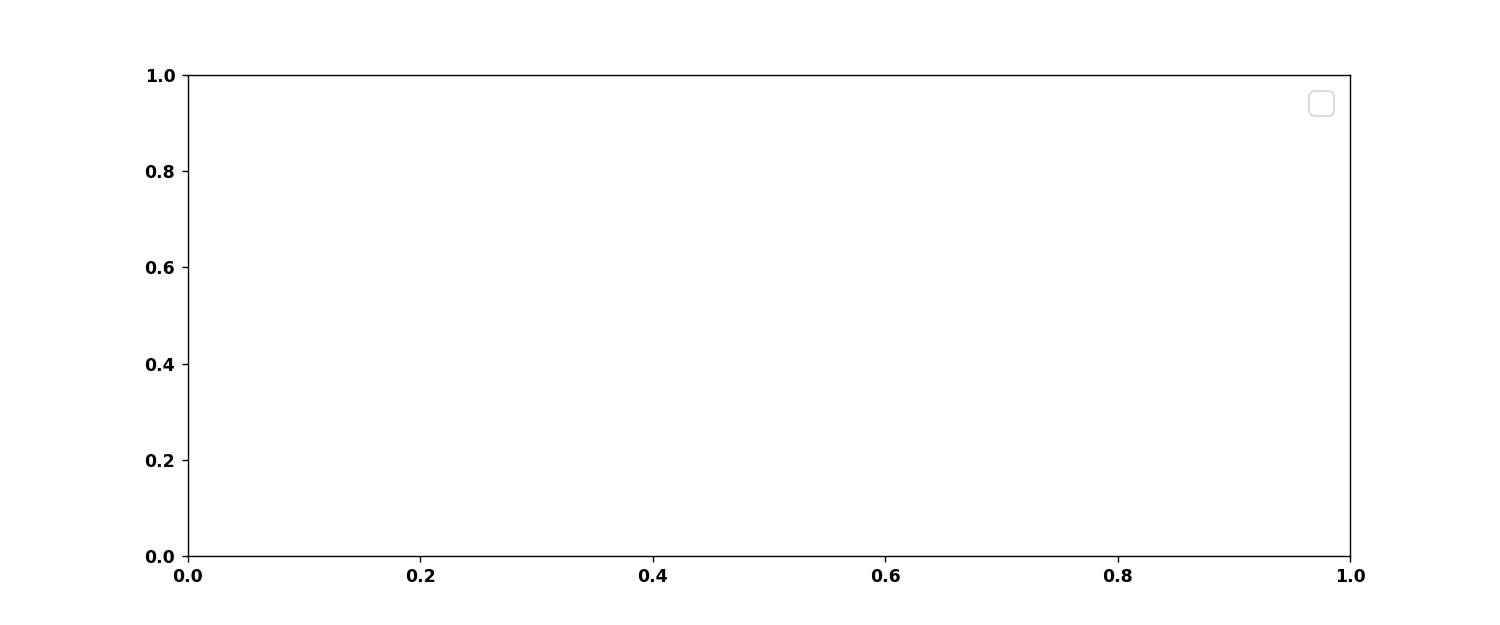

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


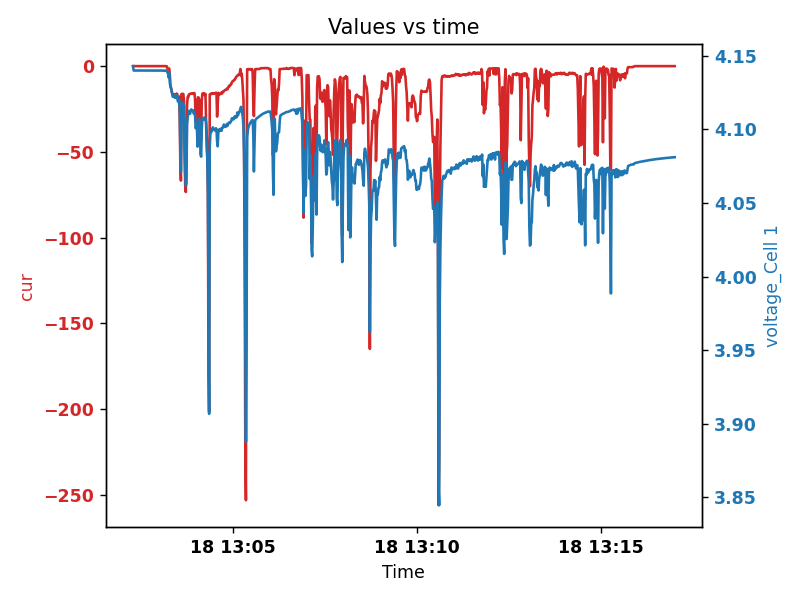

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<IPython.core.display.Javascript object>


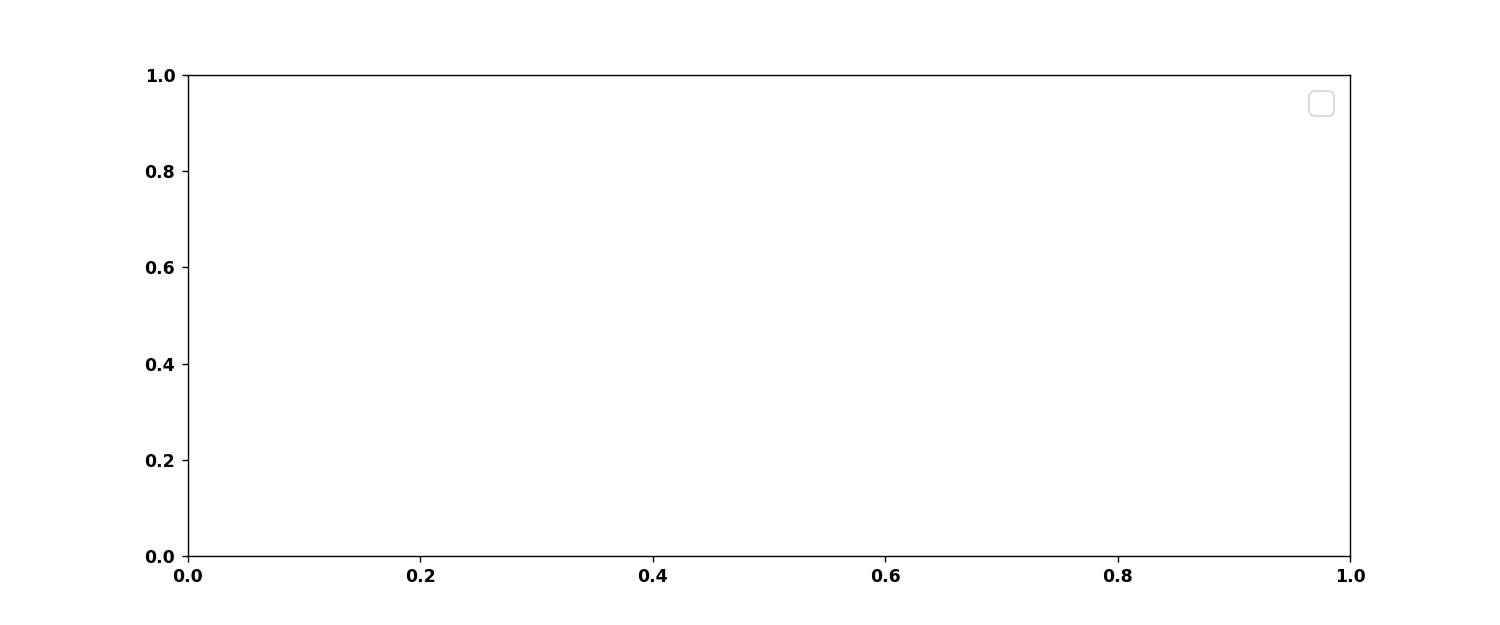

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


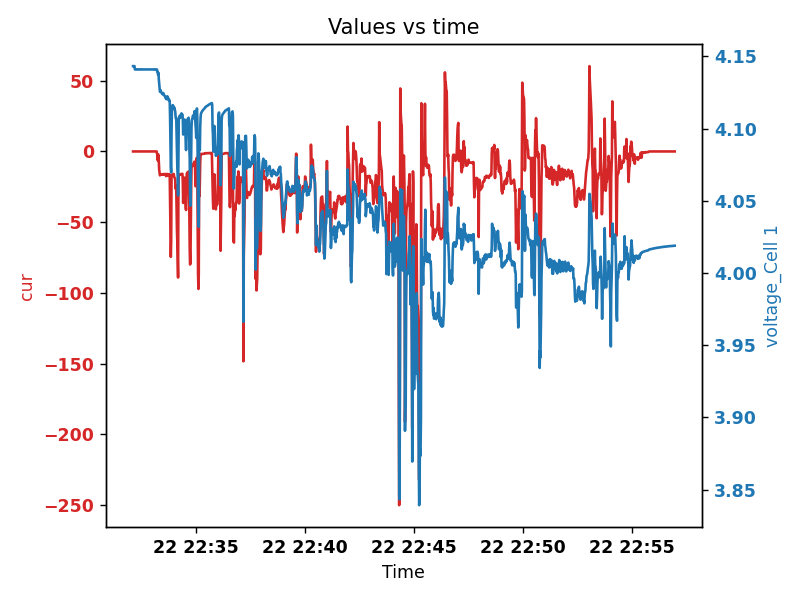

<IPython.core.display.Javascript object>


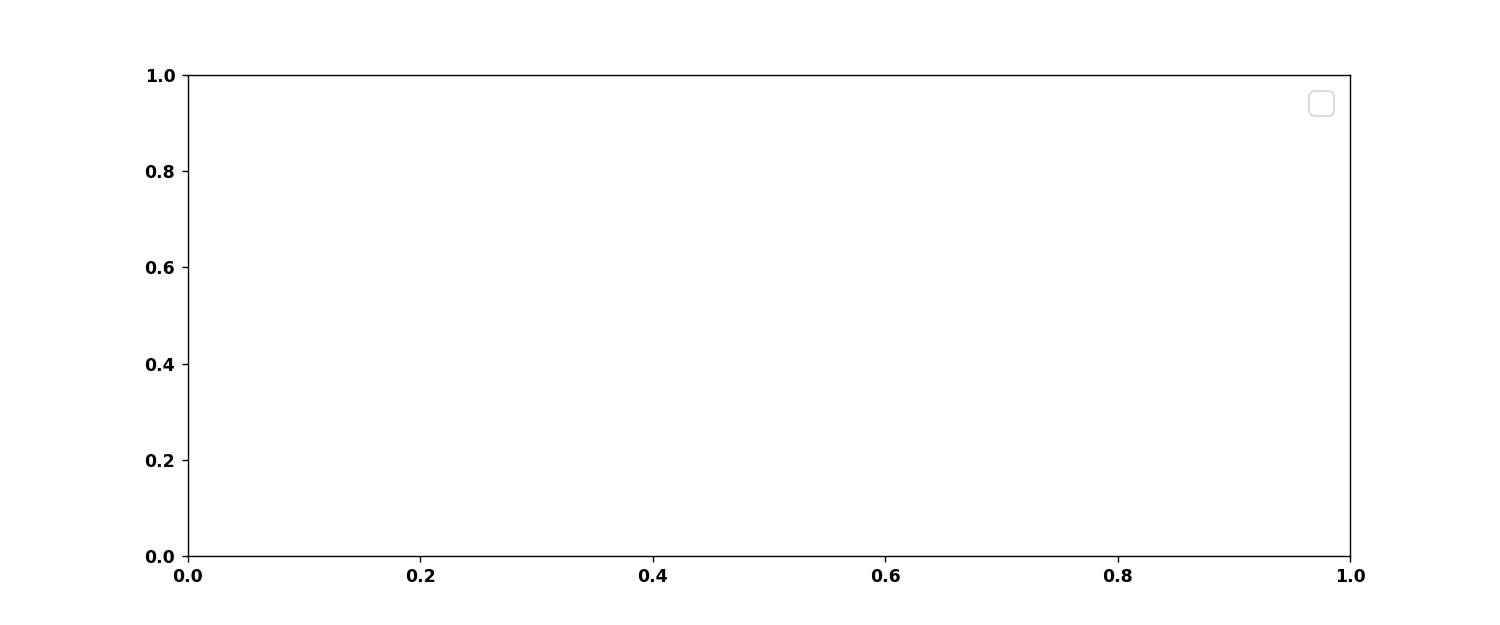

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


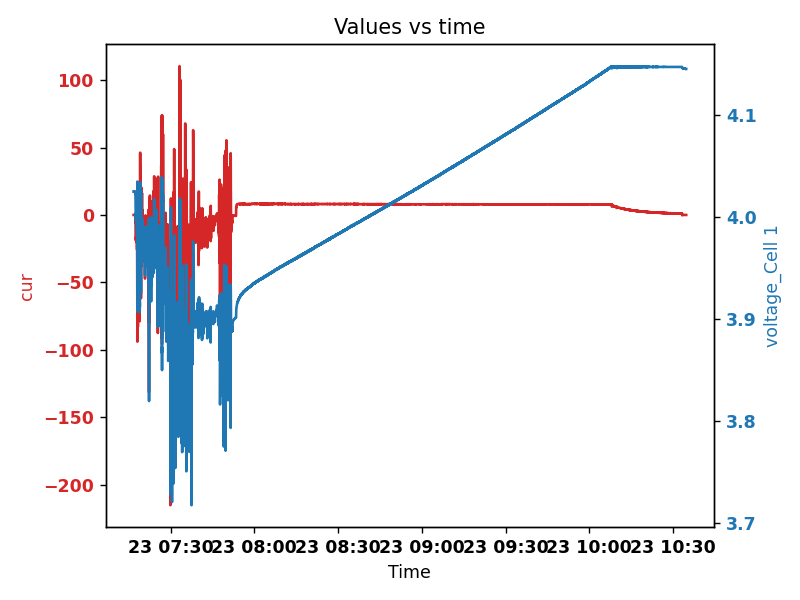

<IPython.core.display.Javascript object>


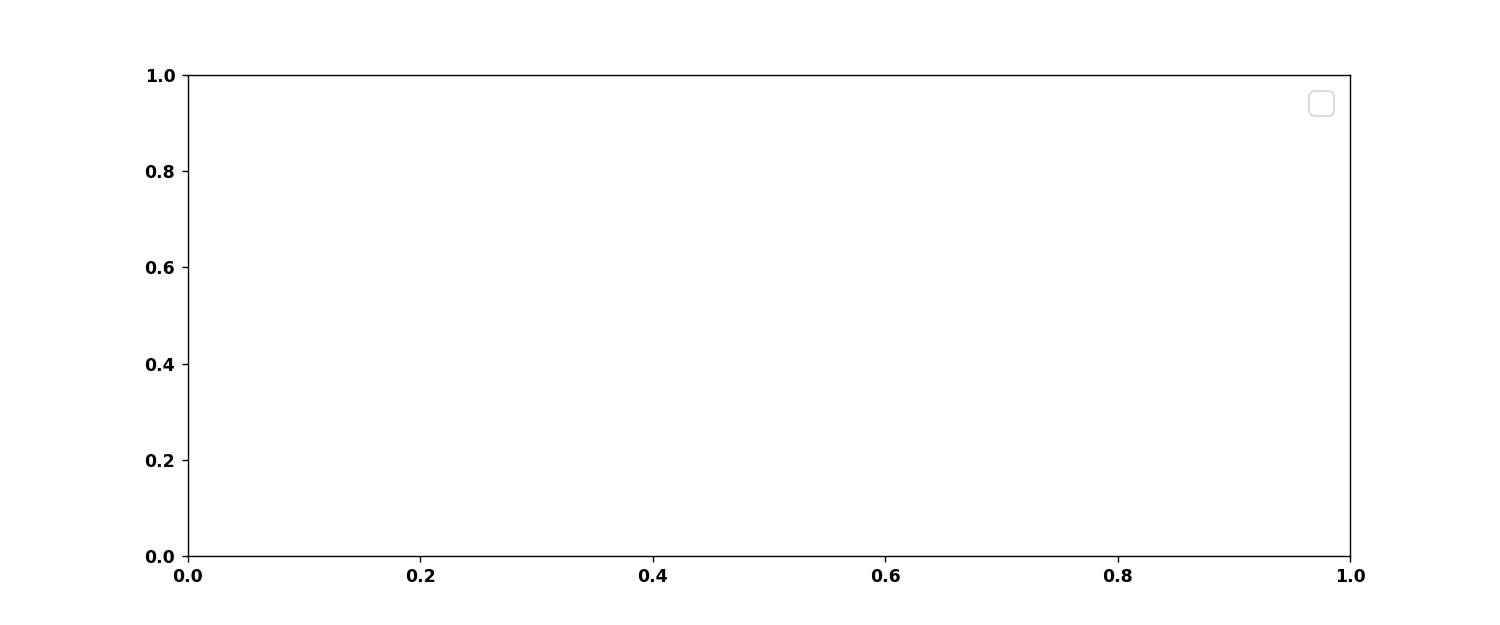

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


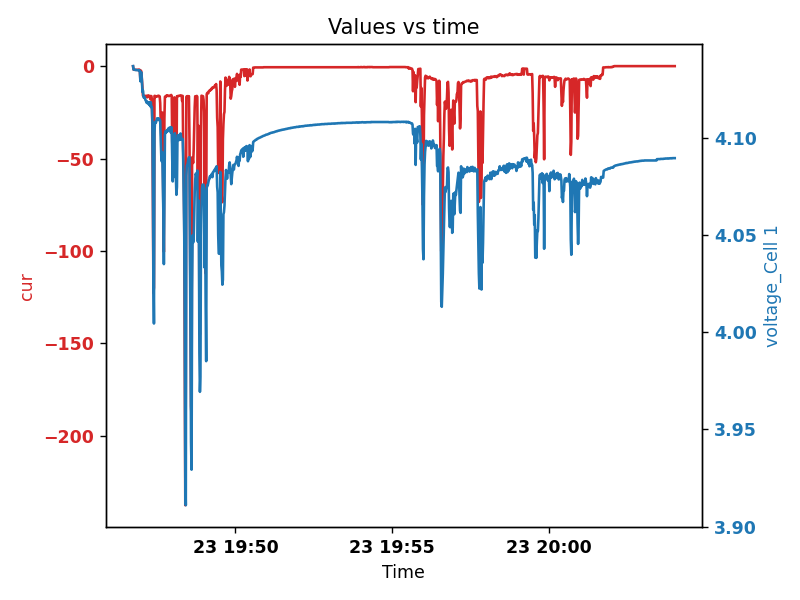

<IPython.core.display.Javascript object>


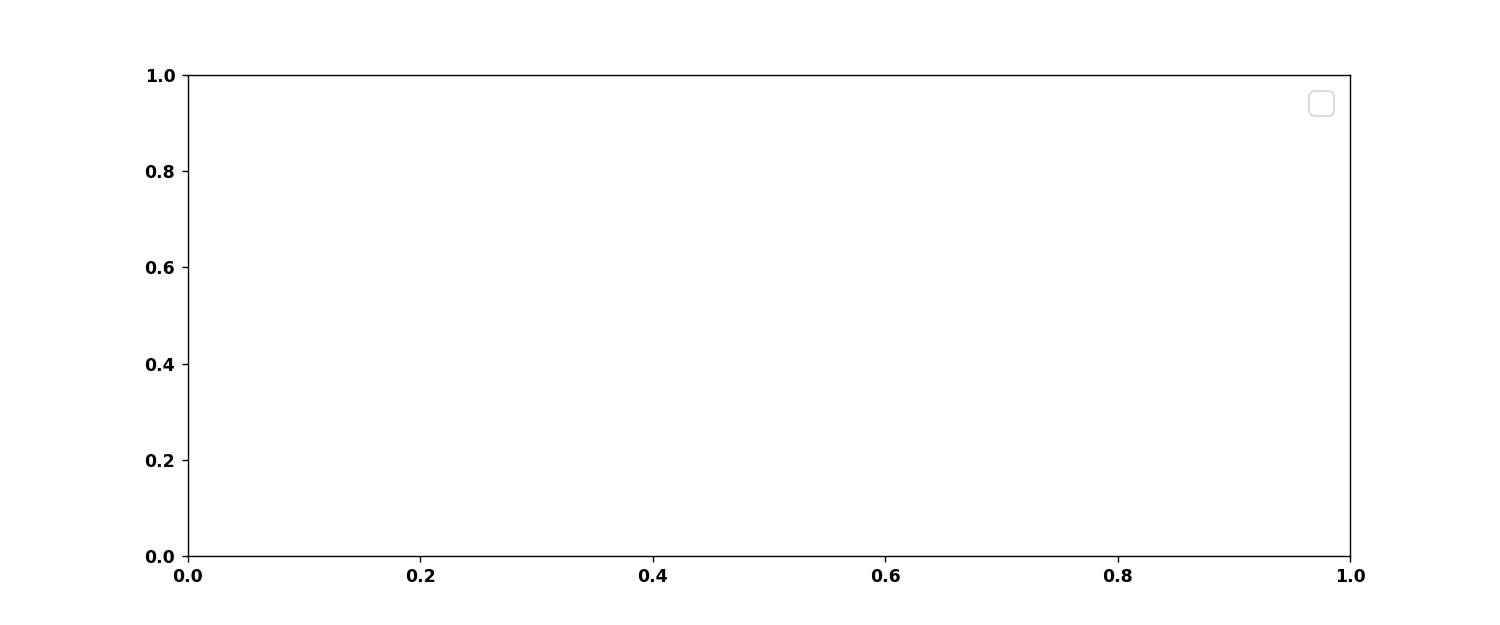

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


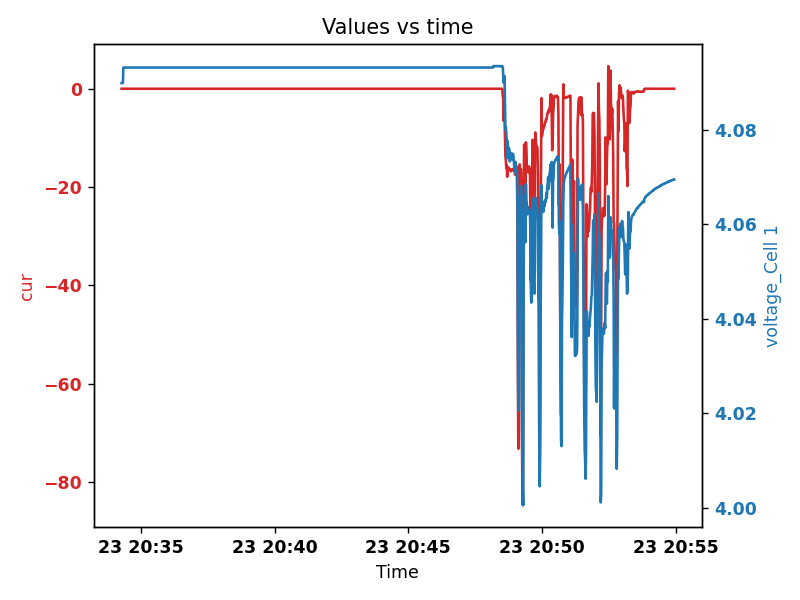

<IPython.core.display.Javascript object>


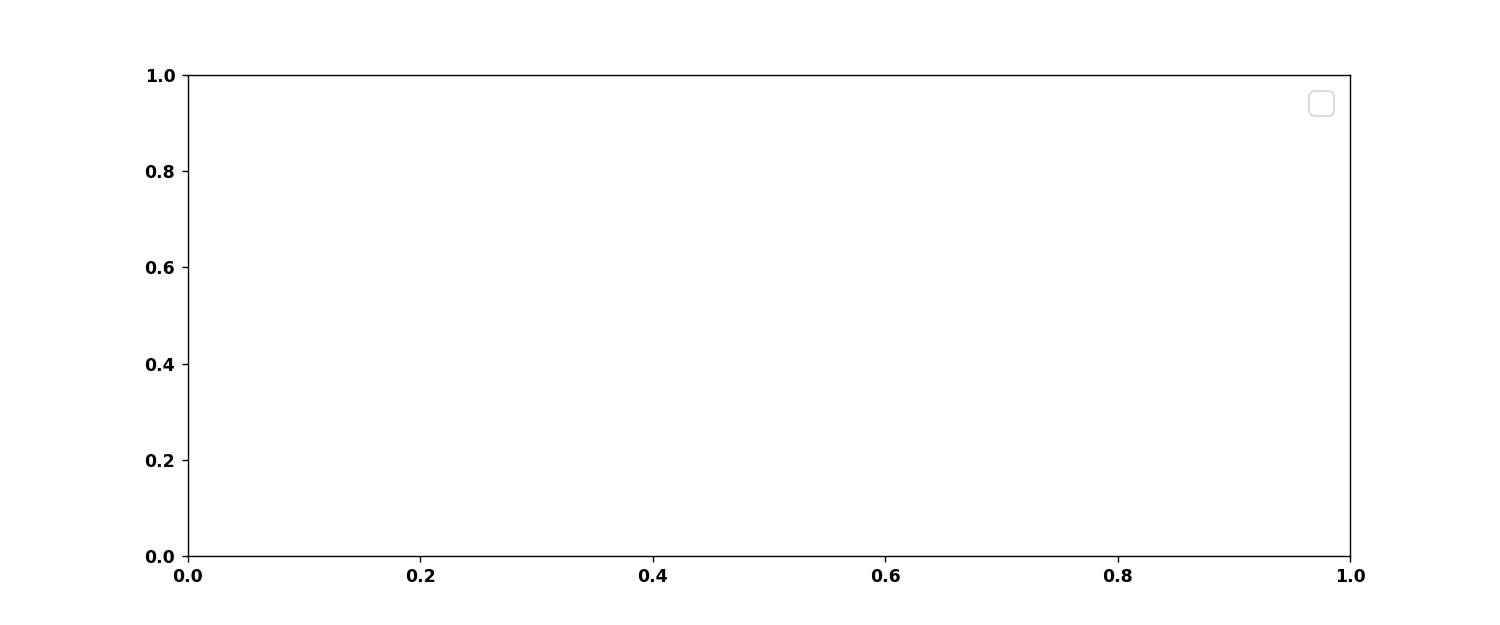

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


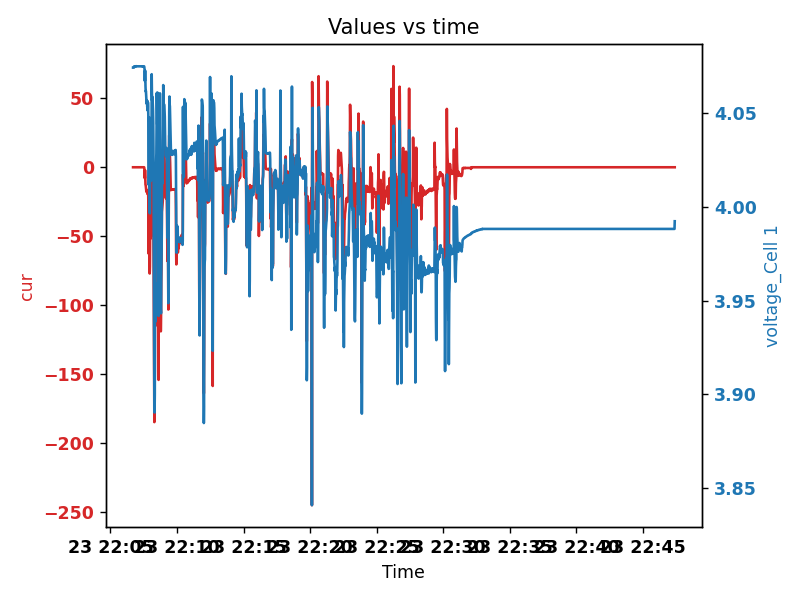

<IPython.core.display.Javascript object>


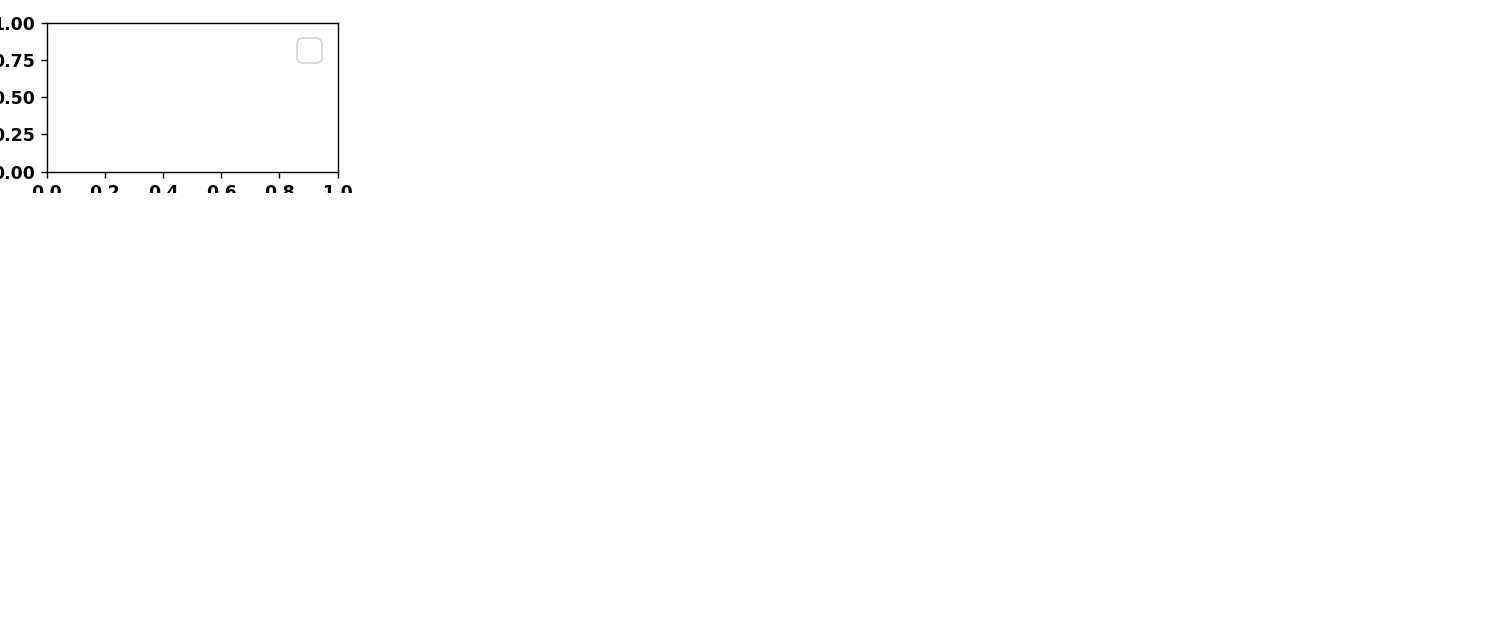

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


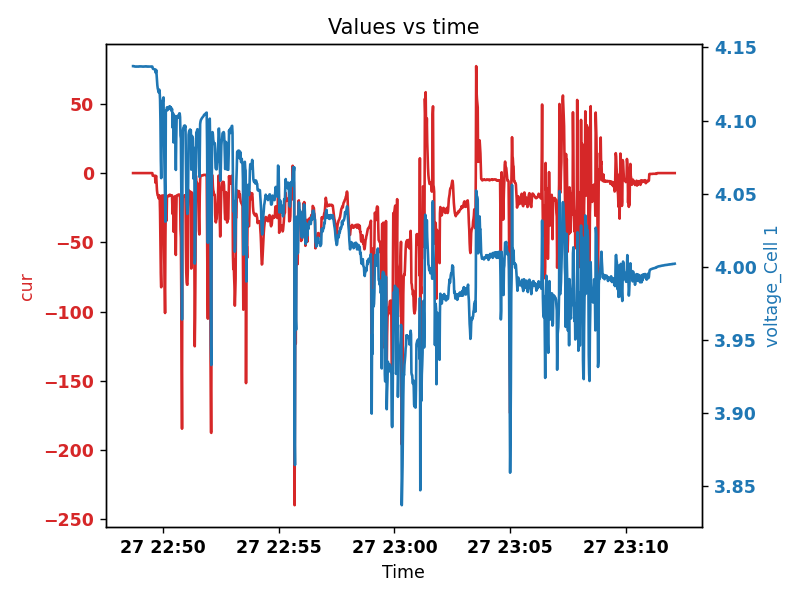

<IPython.core.display.Javascript object>


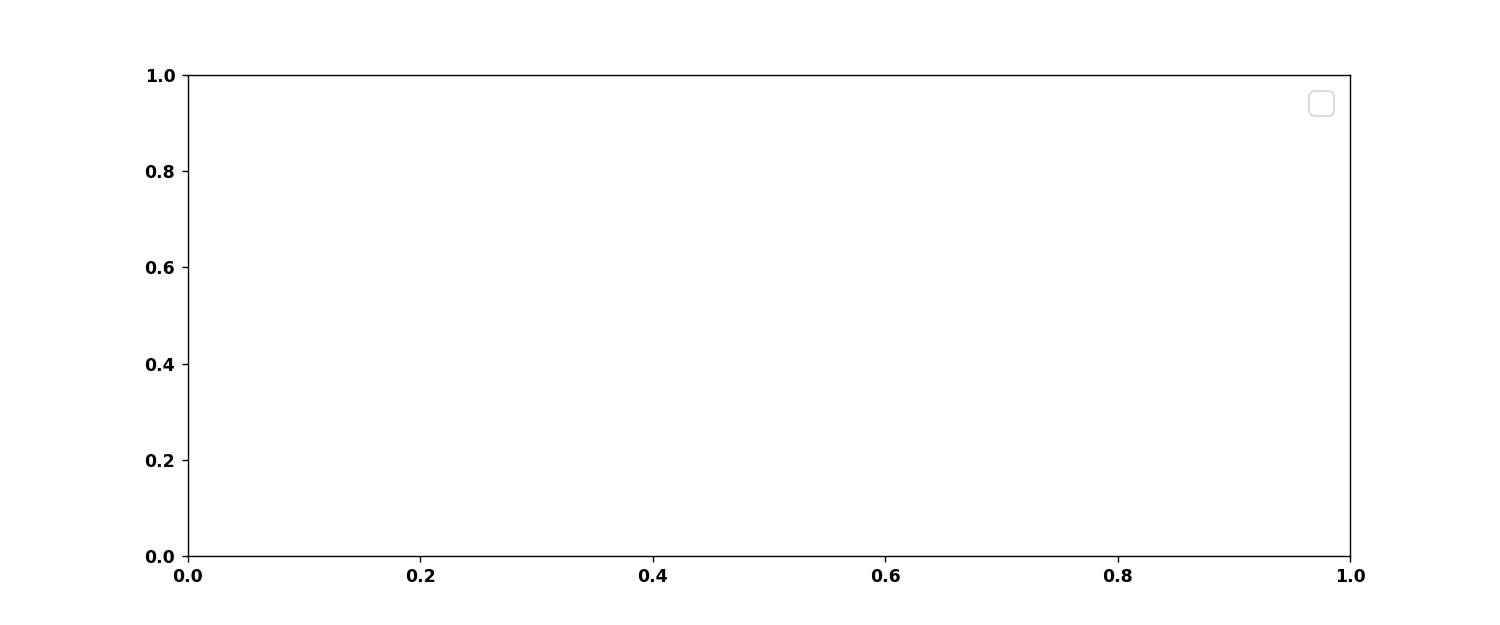

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


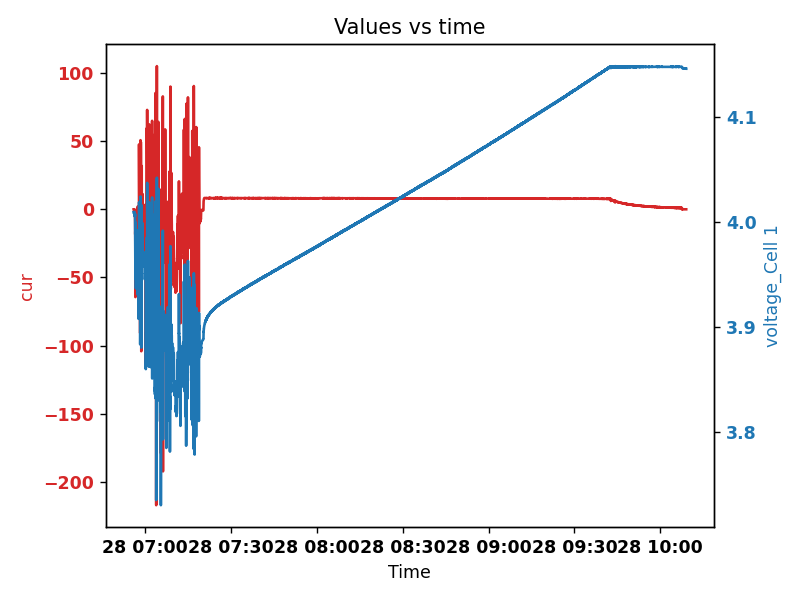

<IPython.core.display.Javascript object>


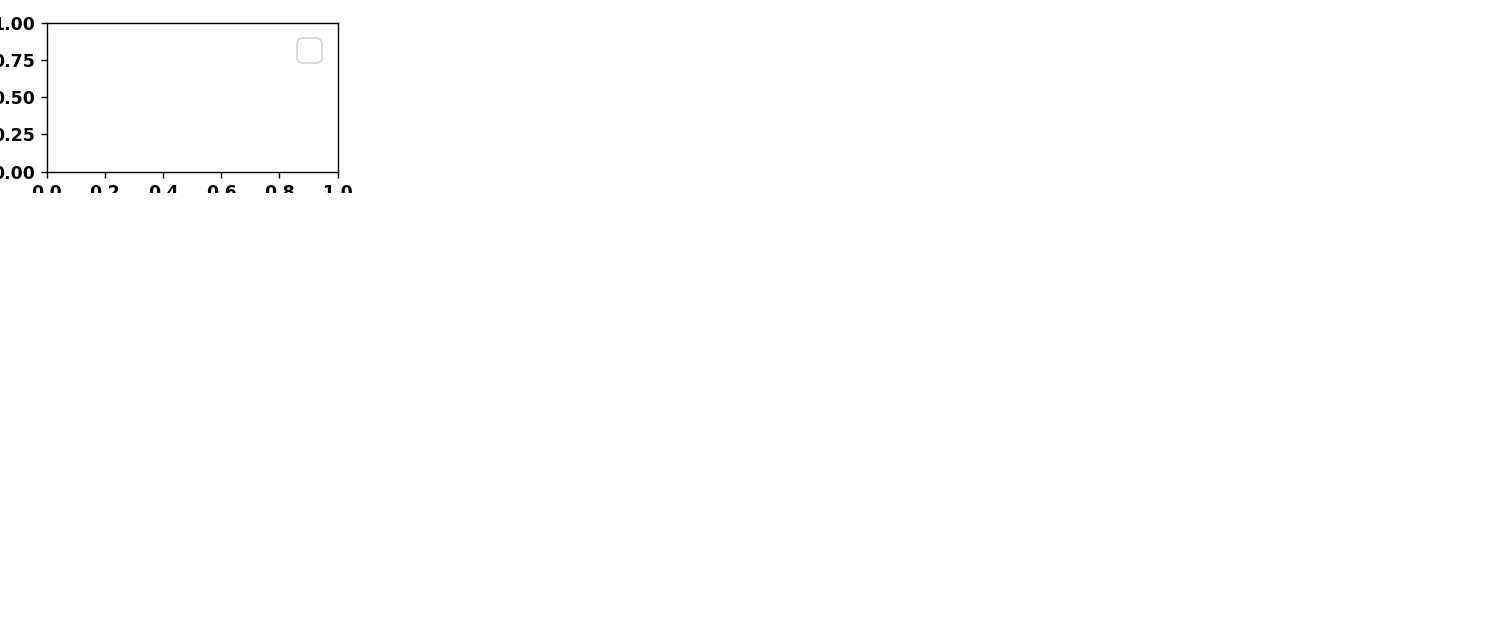

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


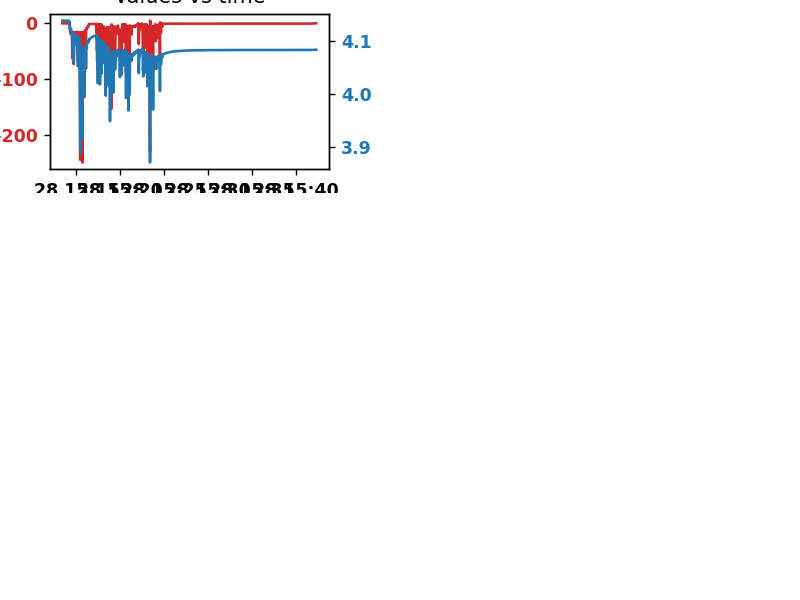

<IPython.core.display.Javascript object>


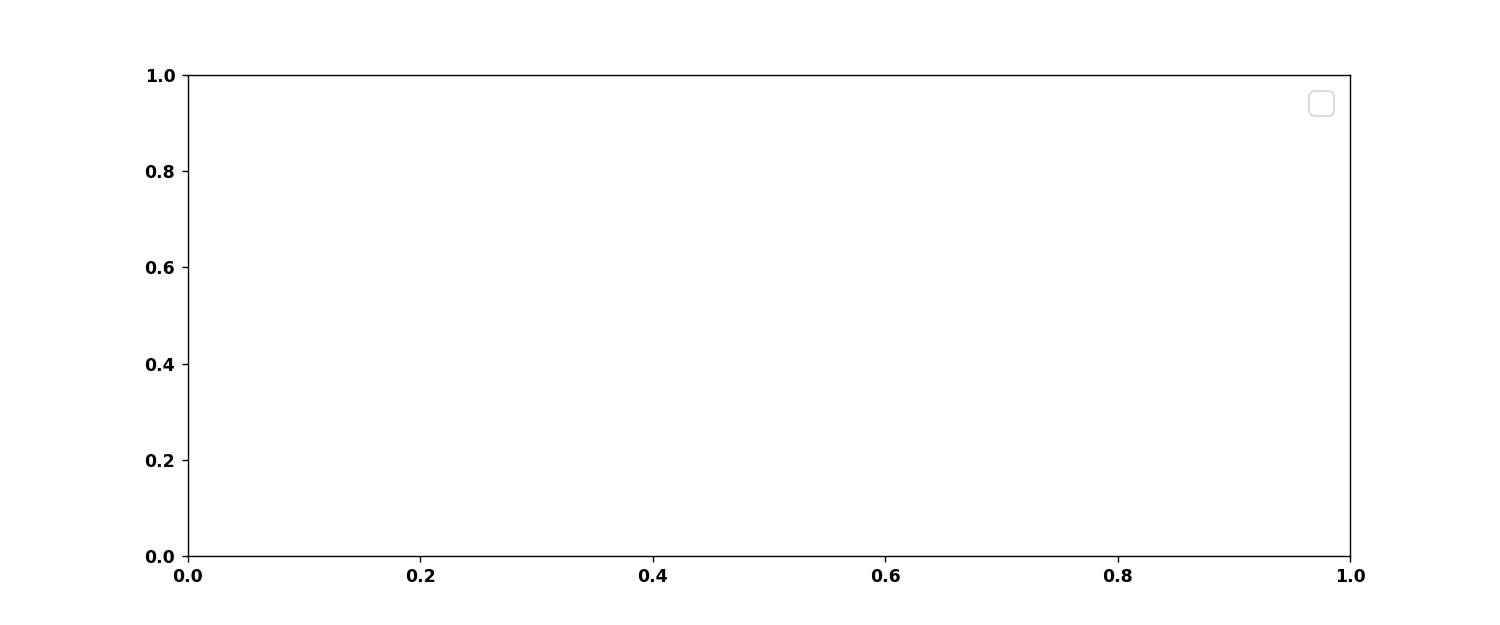

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


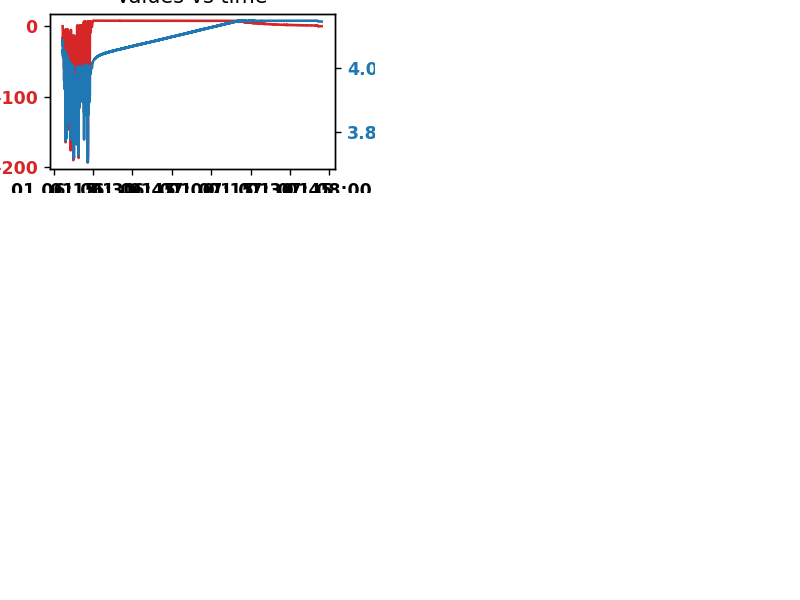

C:\Users\s.kaiser\Experiments\MuleCarData\my_modules\custom_plot.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize =(12 ,5))


<IPython.core.display.Javascript object>


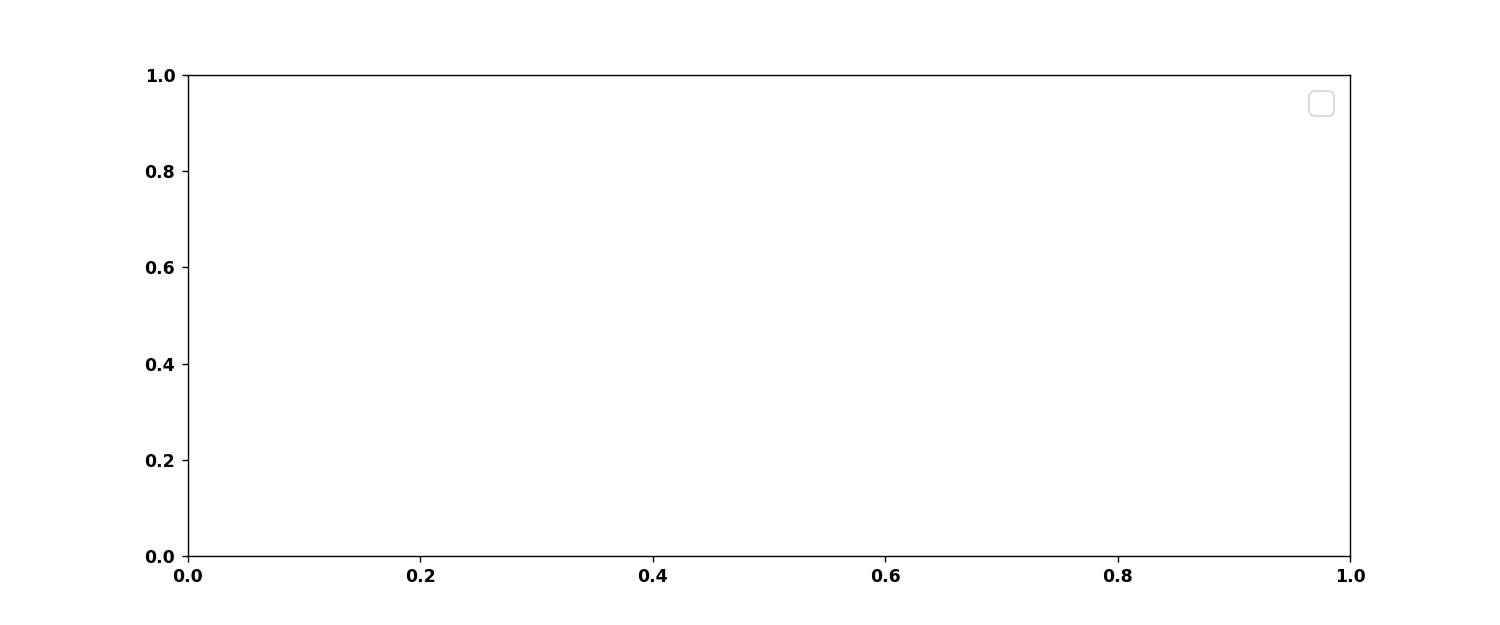

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


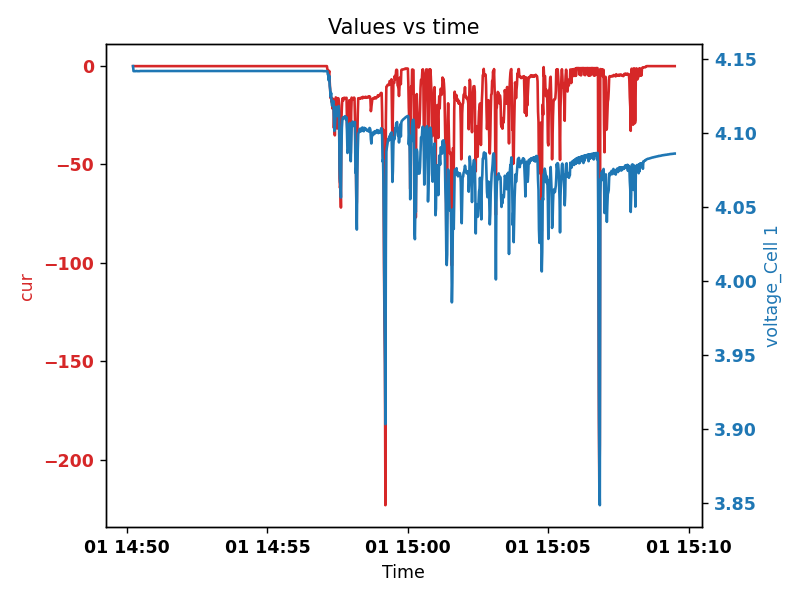

<IPython.core.display.Javascript object>


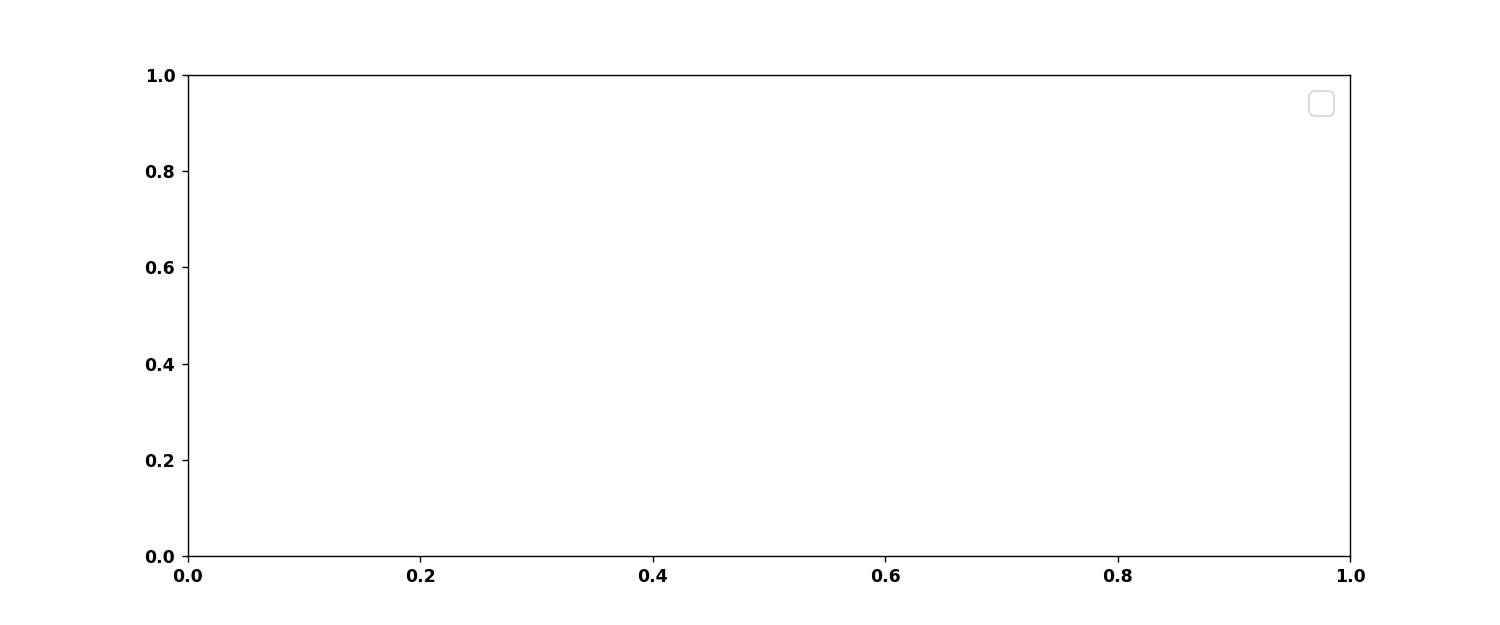

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


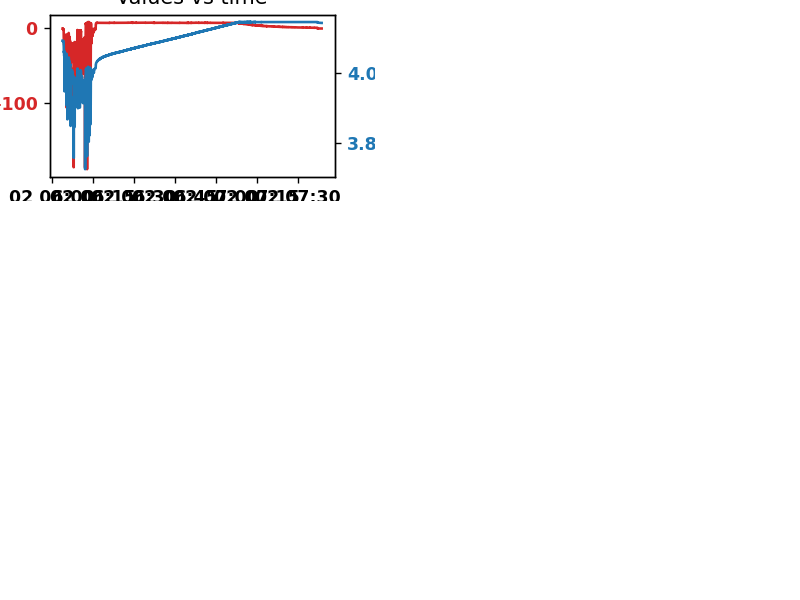

<IPython.core.display.Javascript object>


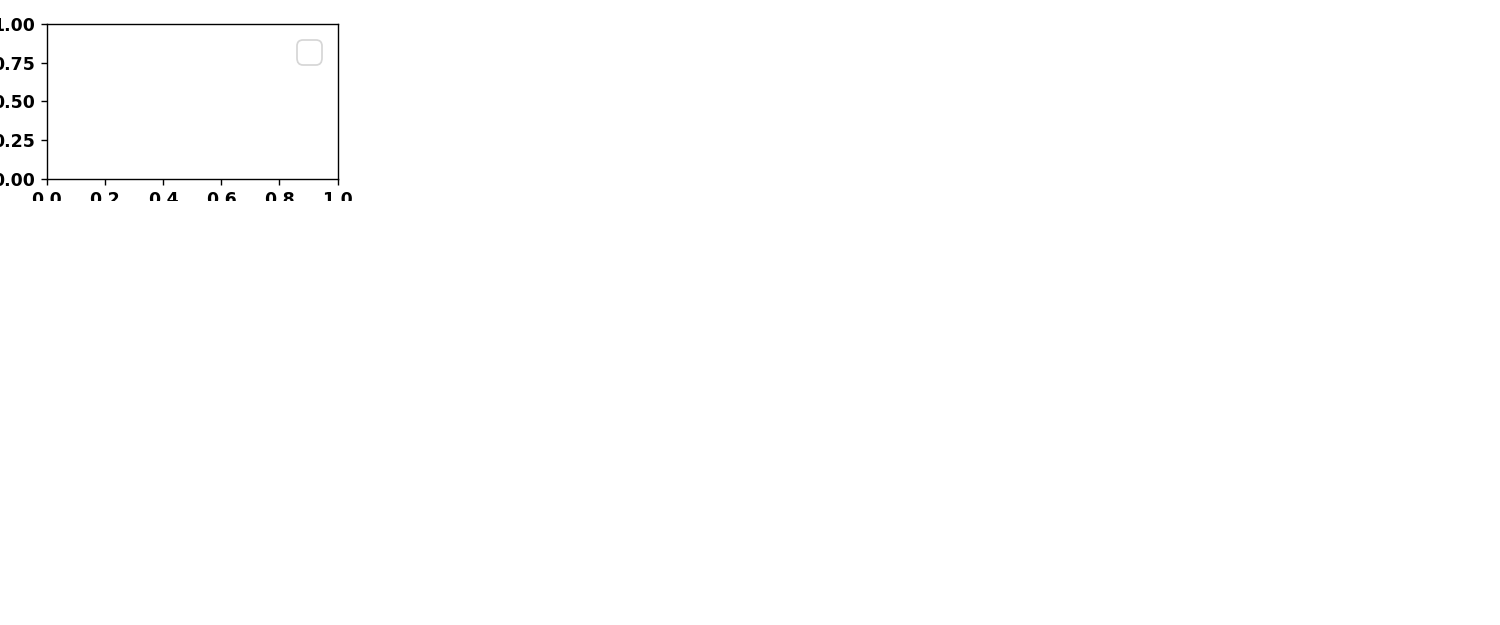

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


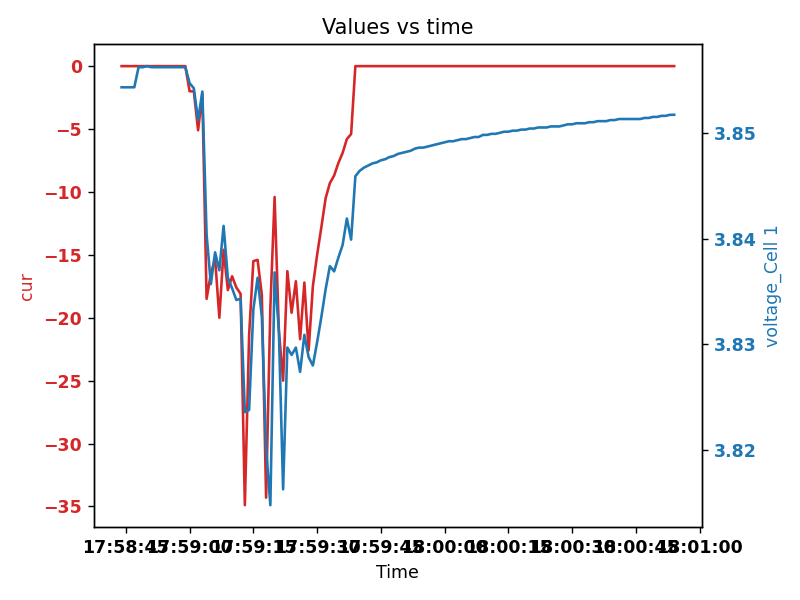

<IPython.core.display.Javascript object>


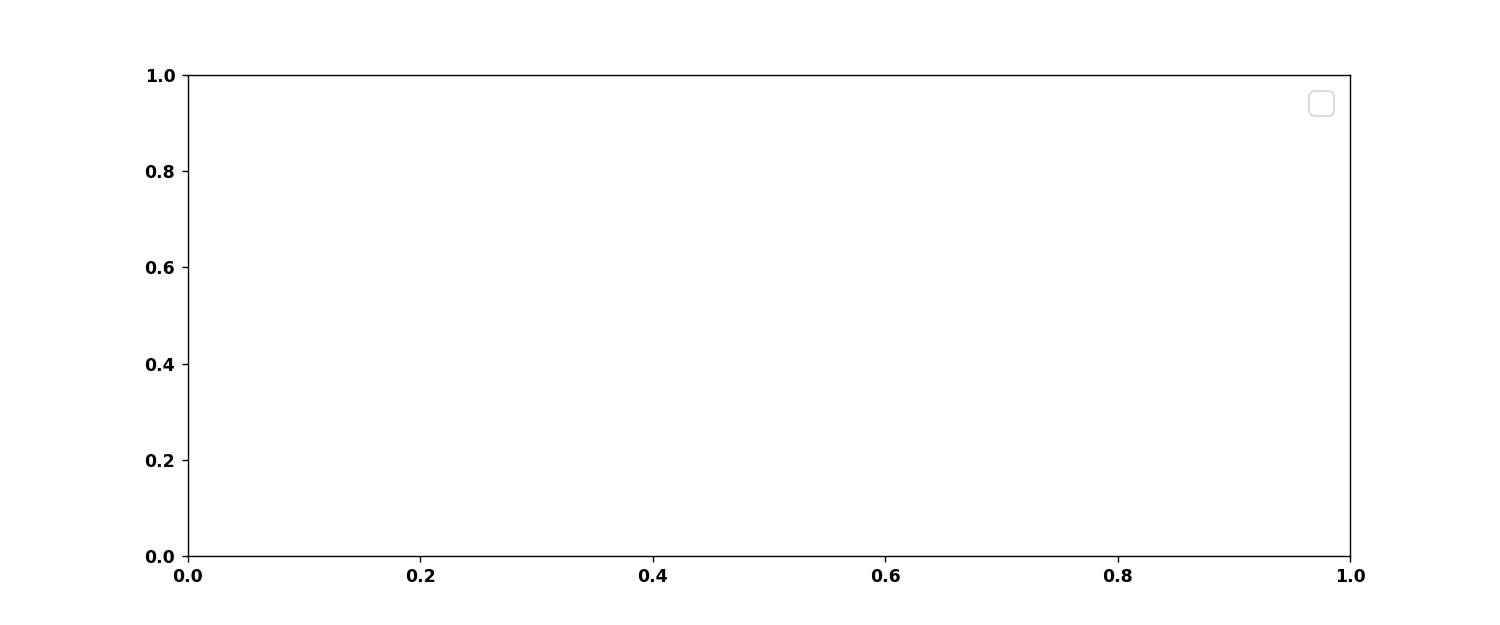

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


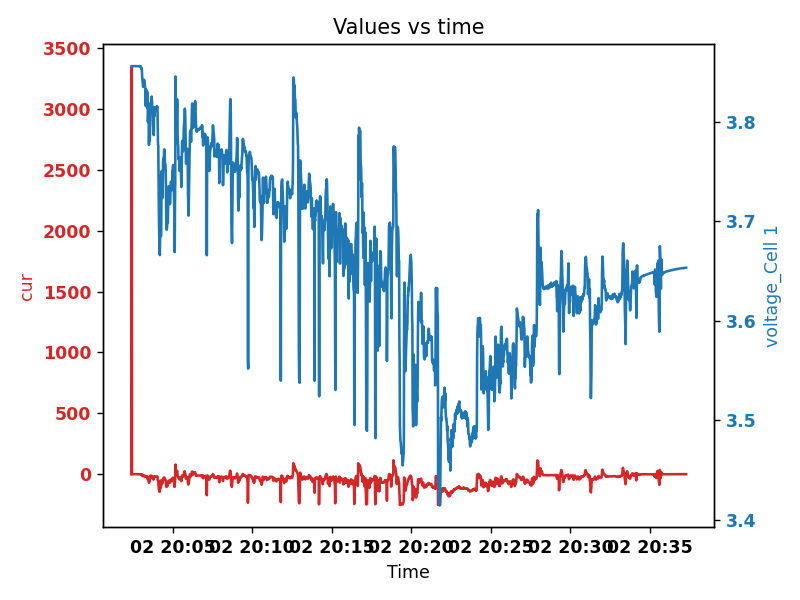

<IPython.core.display.Javascript object>


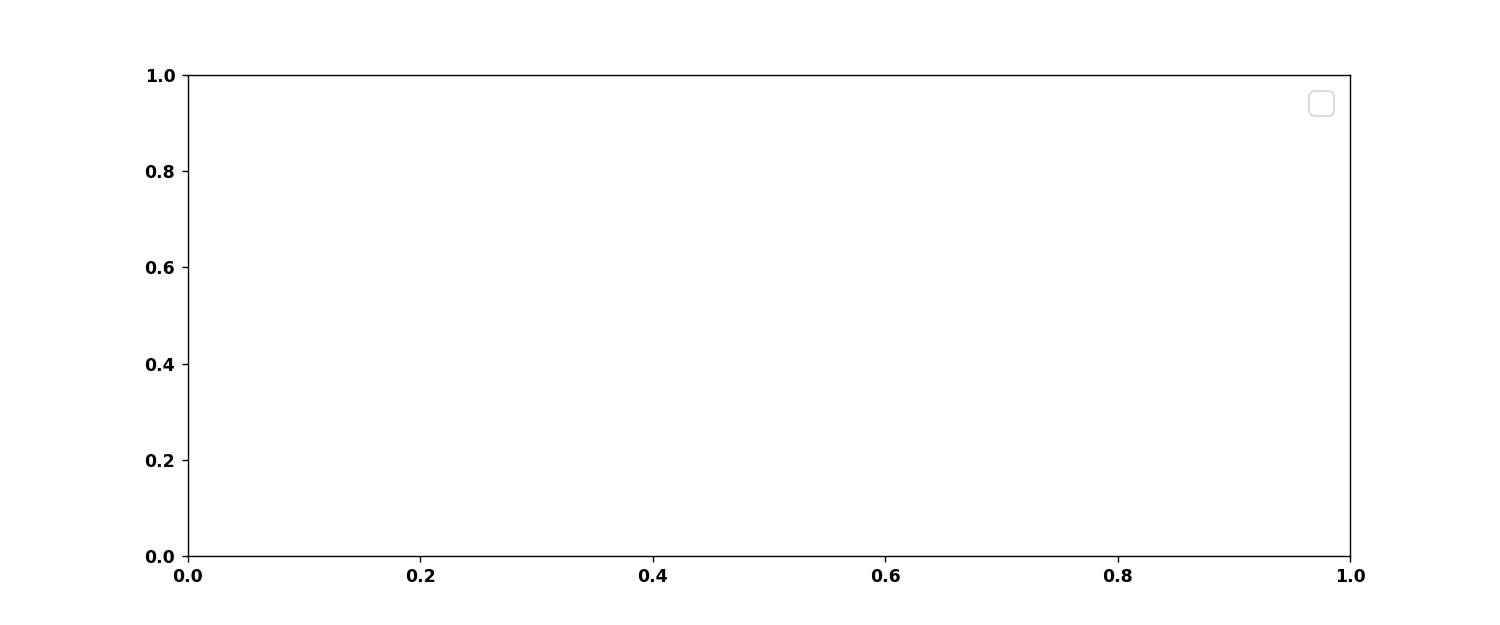

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


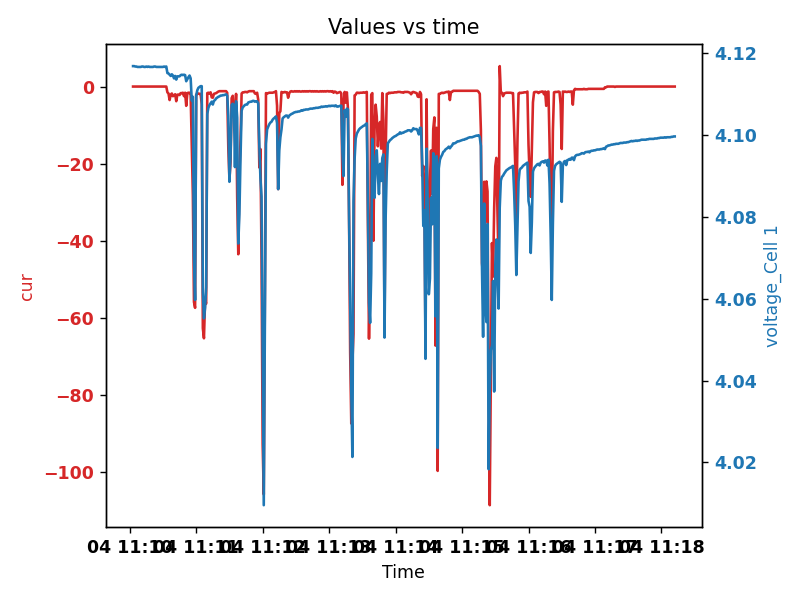

<IPython.core.display.Javascript object>


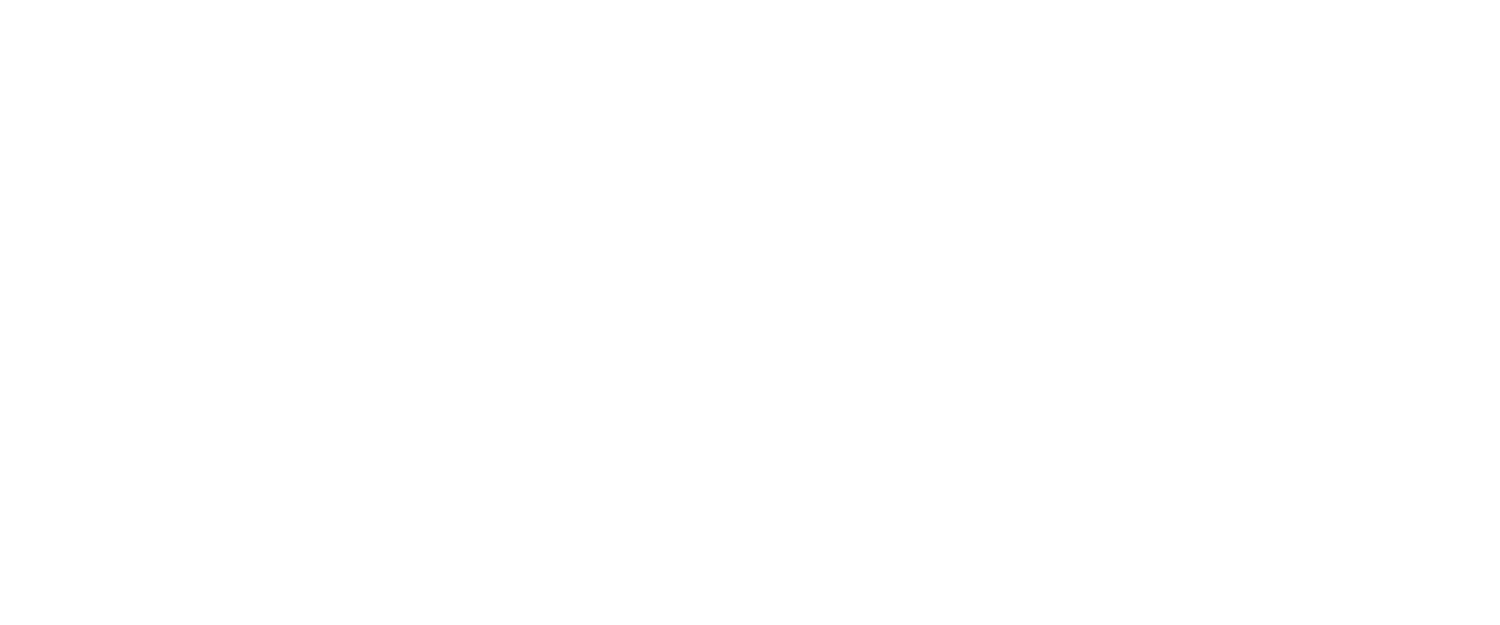

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


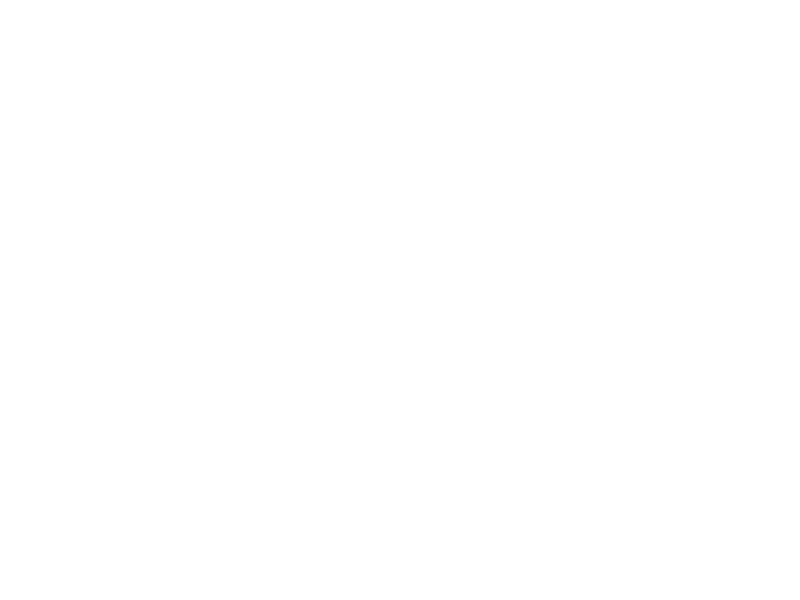

<IPython.core.display.Javascript object>


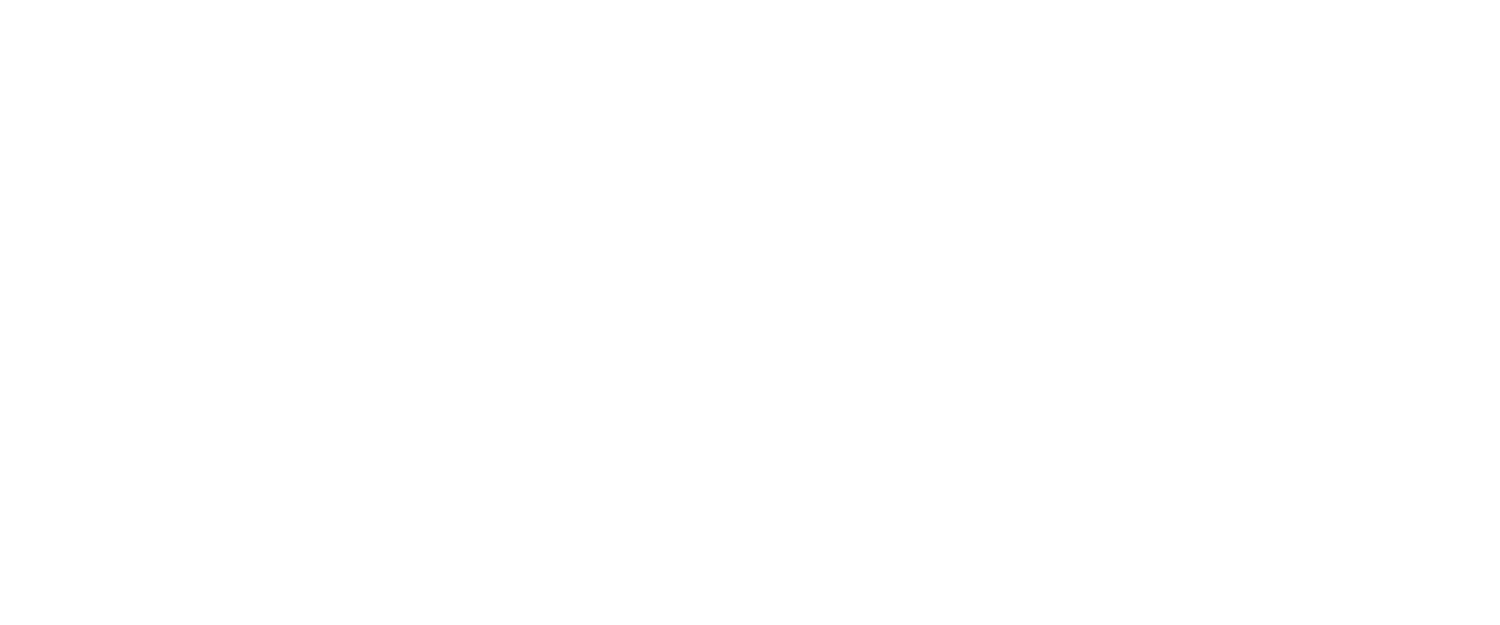

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


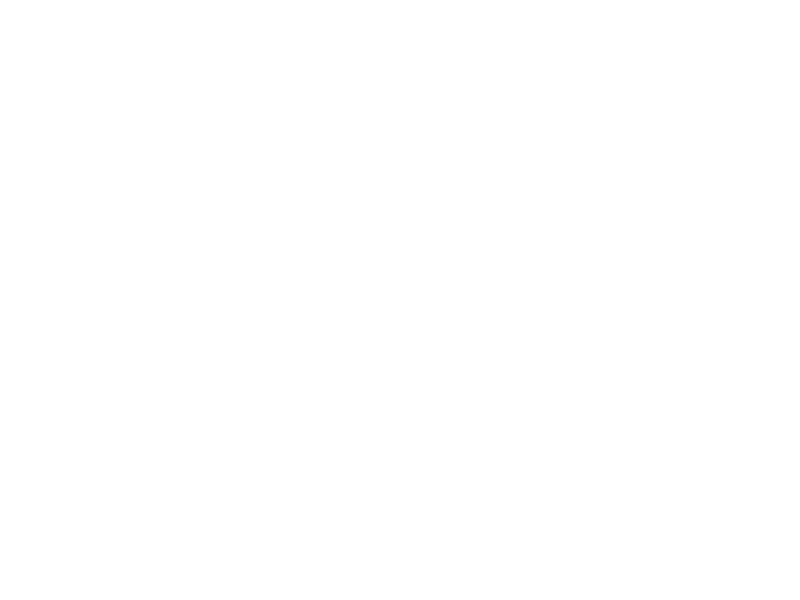

<IPython.core.display.Javascript object>


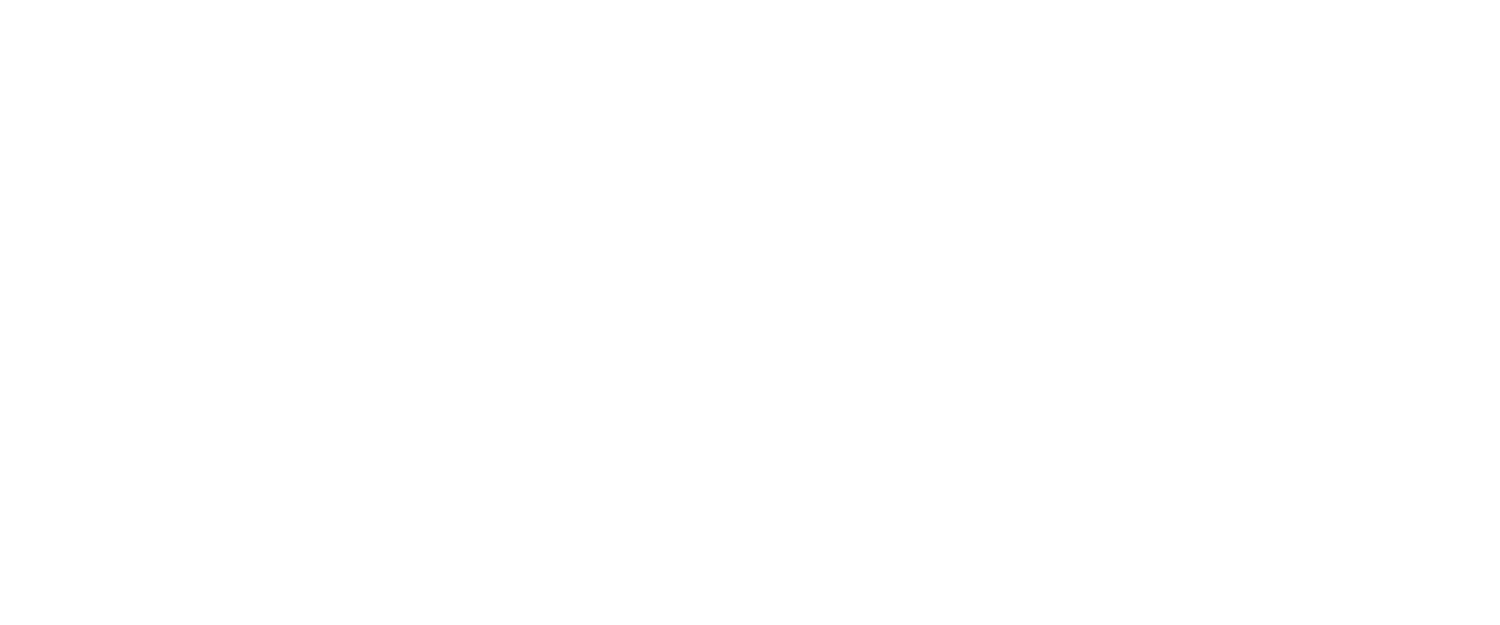

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


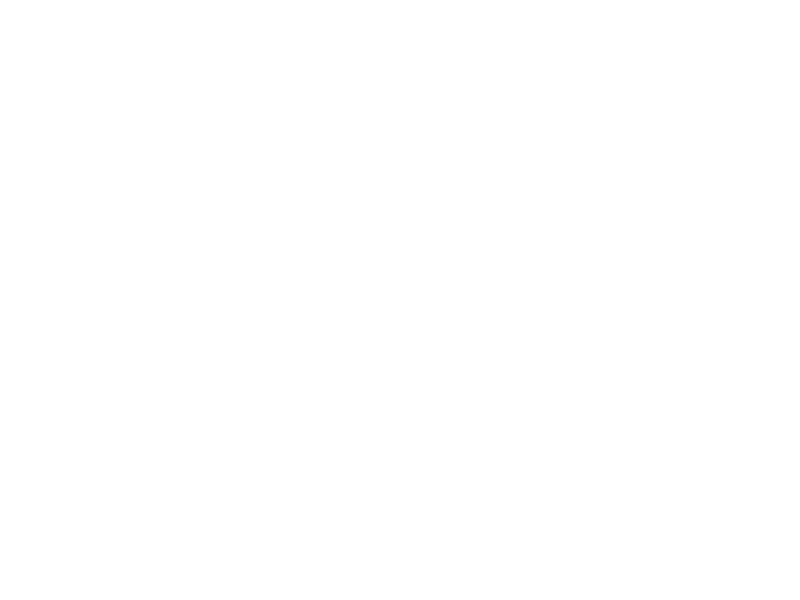

<IPython.core.display.Javascript object>


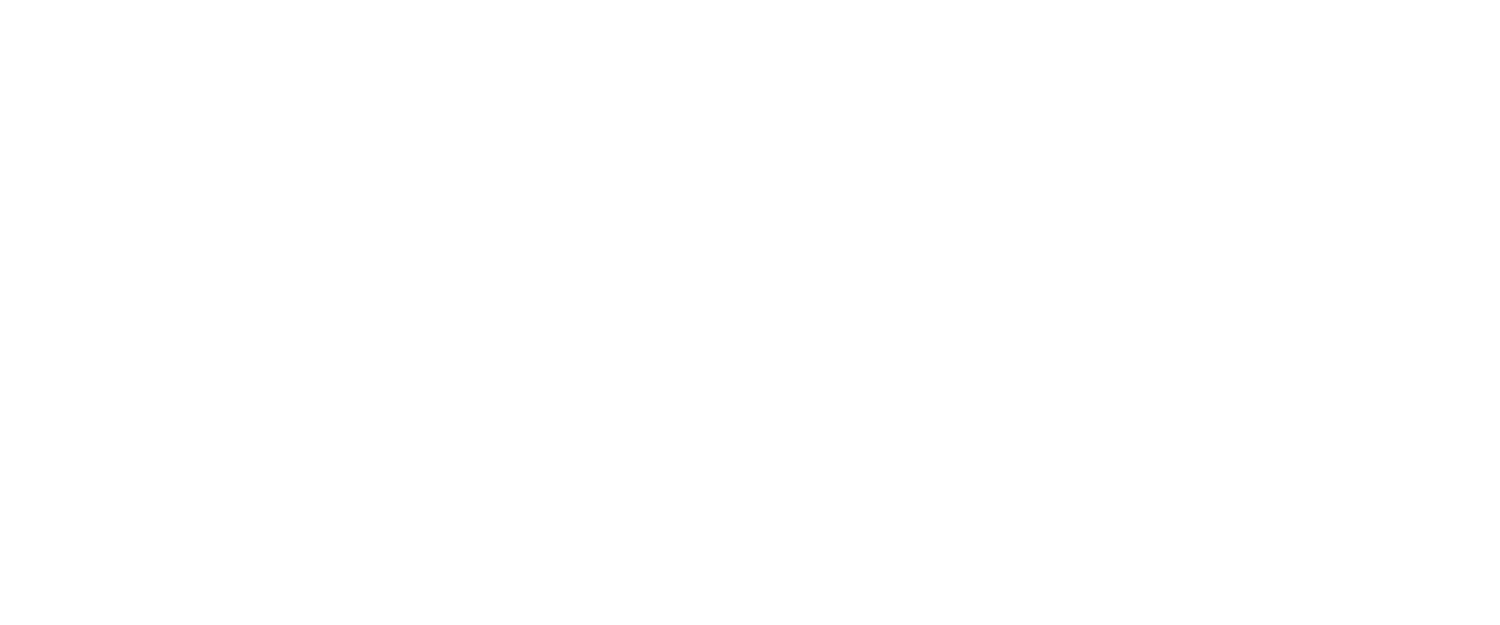

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


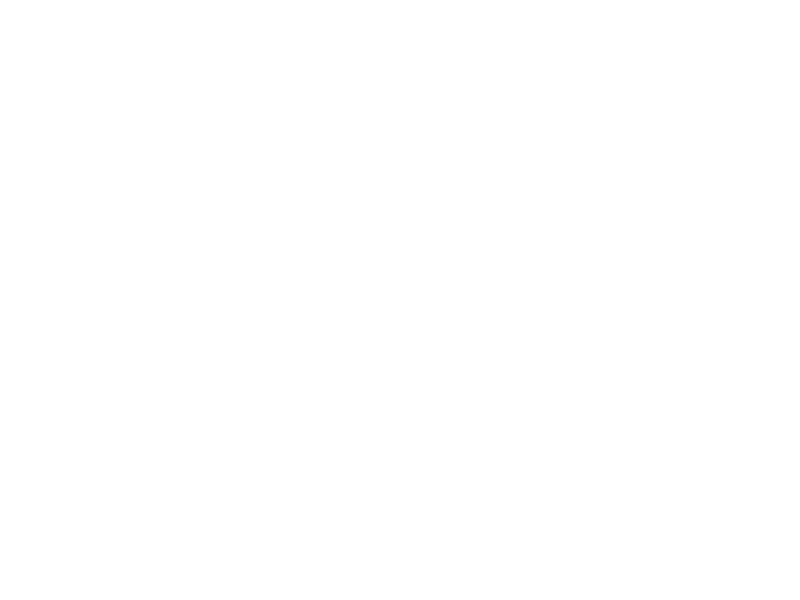

<IPython.core.display.Javascript object>


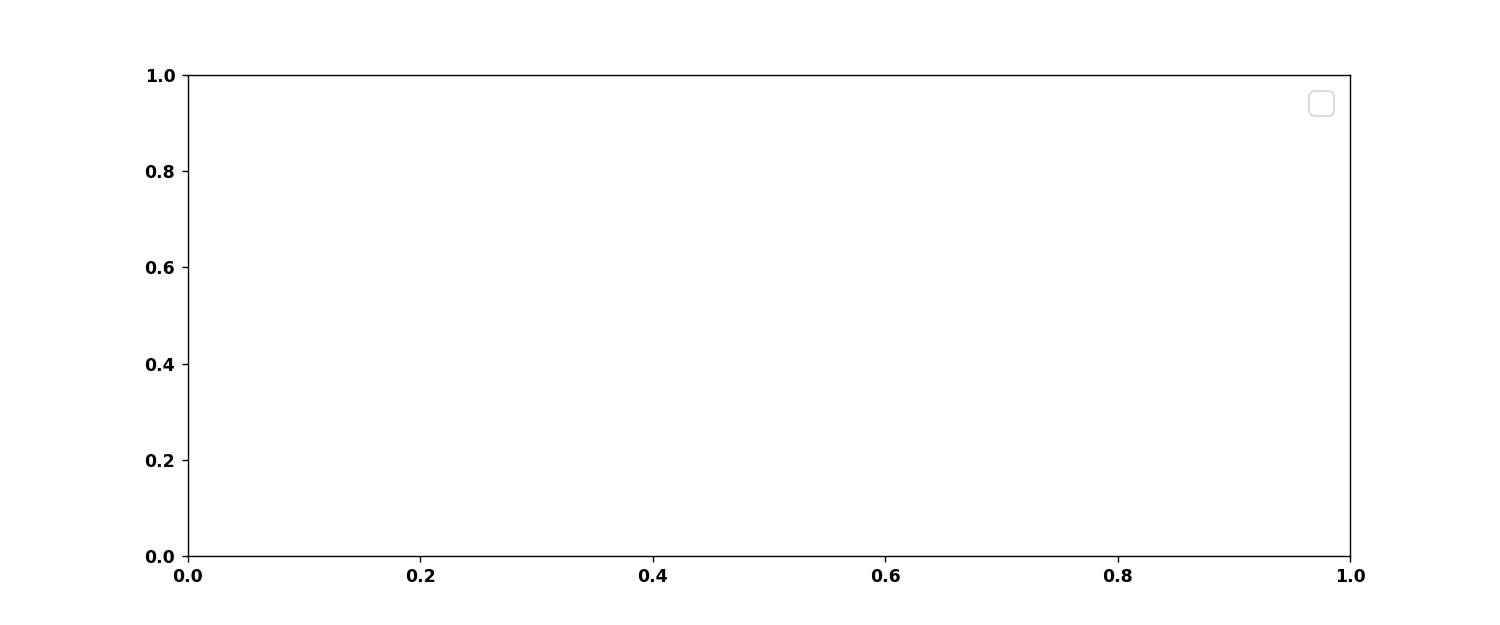

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


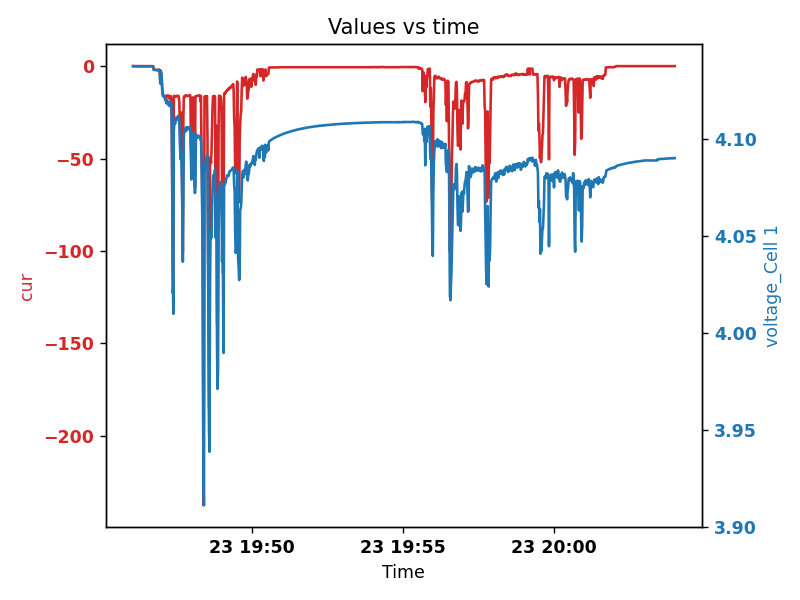

<IPython.core.display.Javascript object>


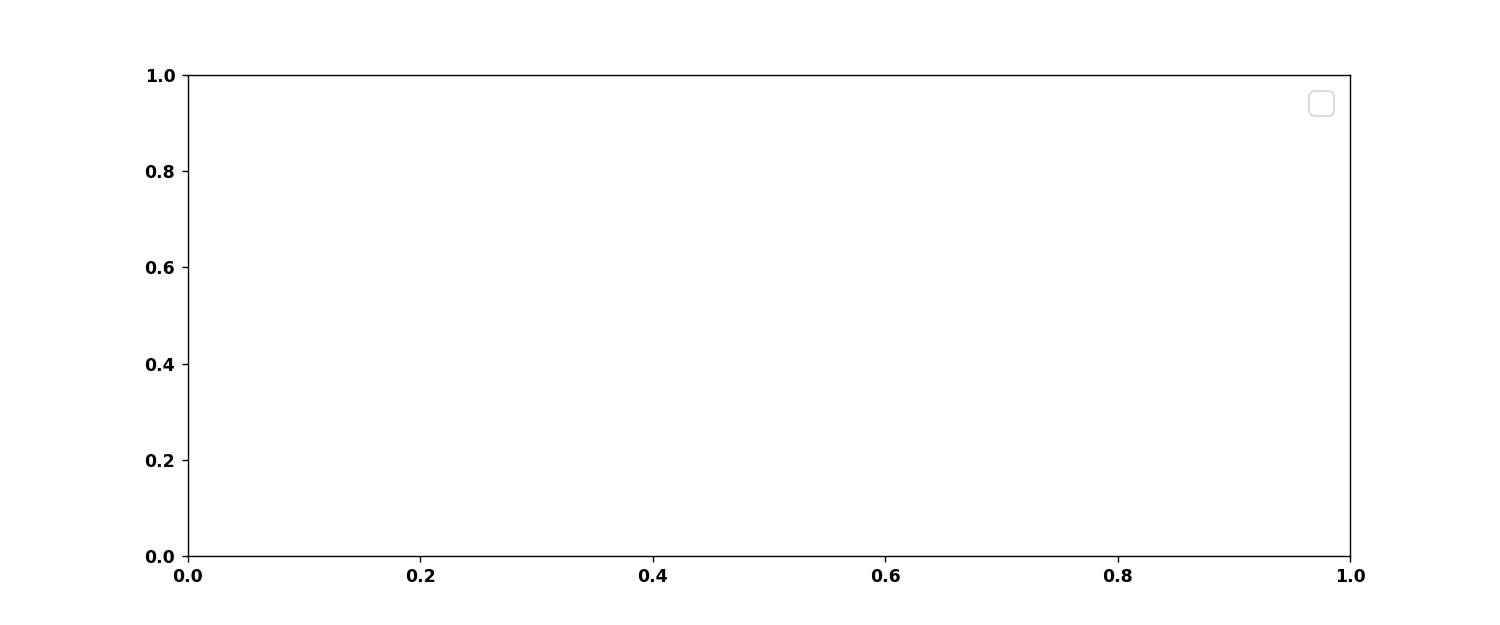

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


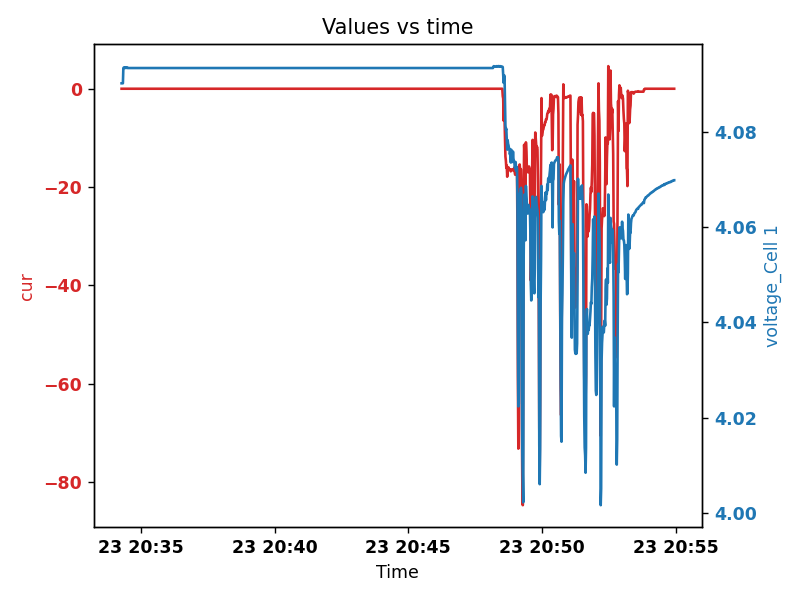

<IPython.core.display.Javascript object>


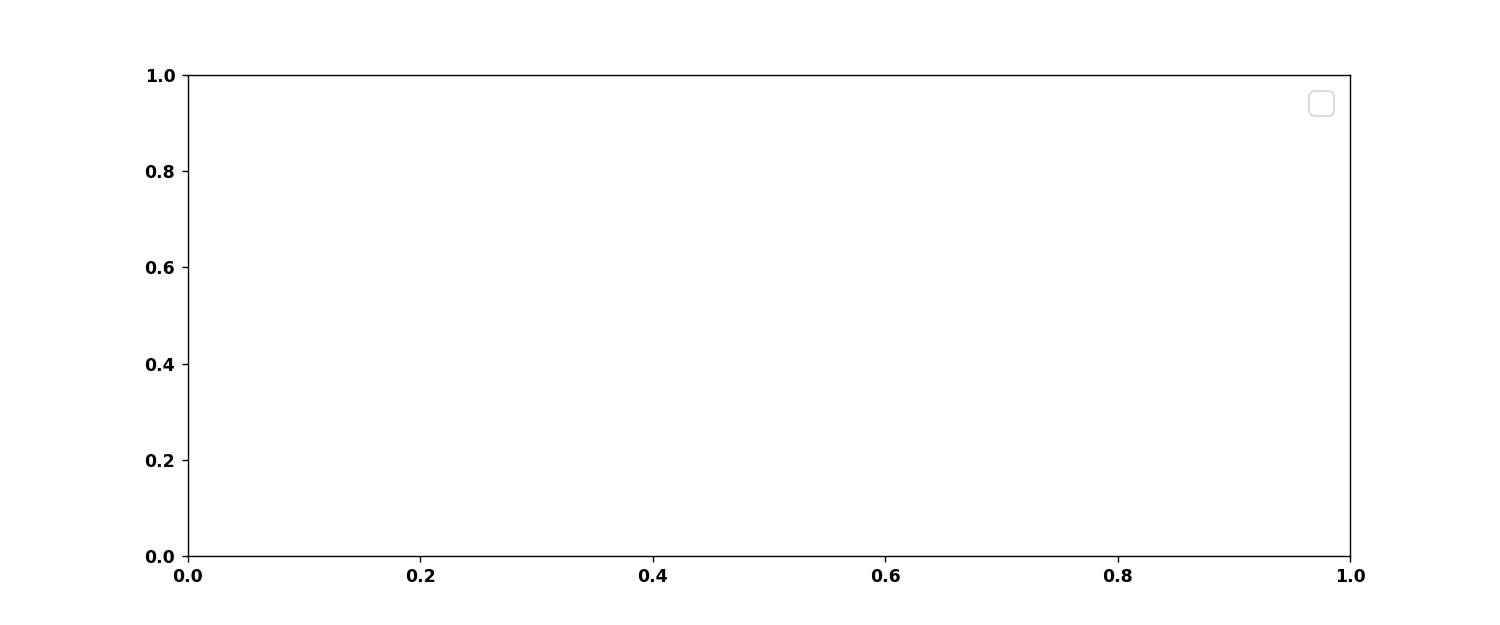

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


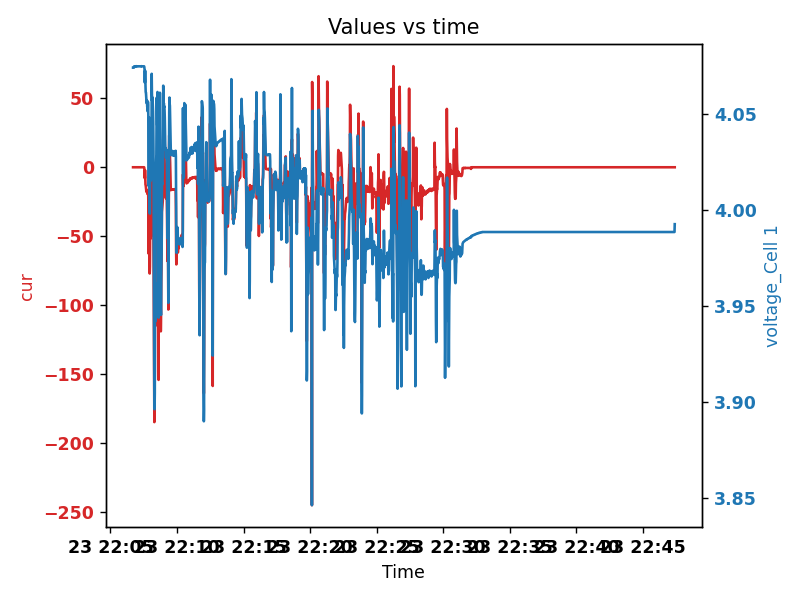

In [15]:
# %matplotlib notebook

# for df_each in li_V1:
#     df_temp = df_each.copy()
# #     plot_xy((df_temp['elapsed_sec'], "Time (s)"), (df_temp['V1'], "V1"))
#     custom_plot.plot_dual_axis((df_temp['timestamp'], "Time"), (df_temp['current'], "cur"), (df_temp['V'], "voltage_Cell 1"))
#     df_temp = np.nan


### Concat all the valid cycles and add a elapsed_second column for an easy timestamp (test)

In [16]:
df_connected_V1 = pd.concat(li_V1)
df_connected_V1['timestamp'].is_monotonic_increasing

False

In [17]:
# Add counter as time, assuming all dynamic records are continuous
df_connected_V1['counter'] = range(len(df_connected_V1))
print(df_connected_V1.columns)
print(df_connected_V1.shape[0])
print(df_connected_V1['counter'].max())   # should be equal to shape[0]

In [19]:
# Check whether time is increasing
print(df_connected_V1['counter'].is_monotonic_increasing)
print(df_connected_V1['timestamp'].is_monotonic_increasing)

True
False


<IPython.core.display.Javascript object>


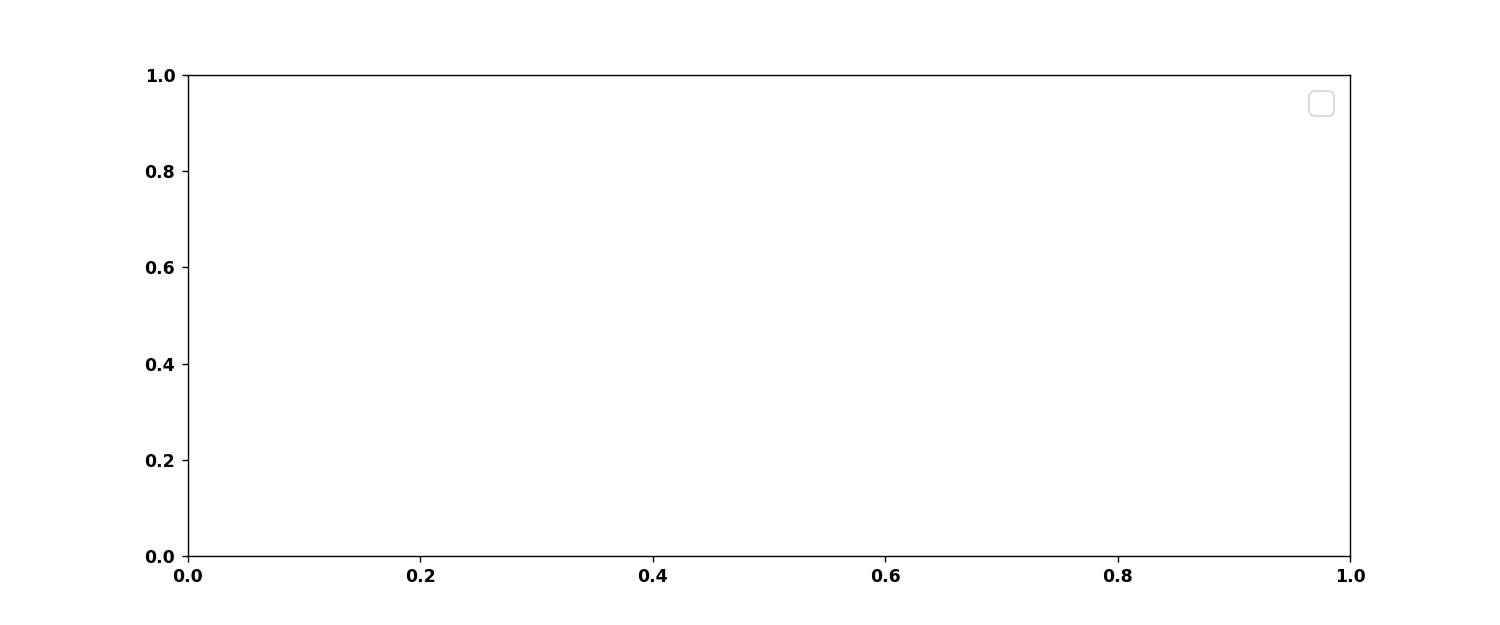

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


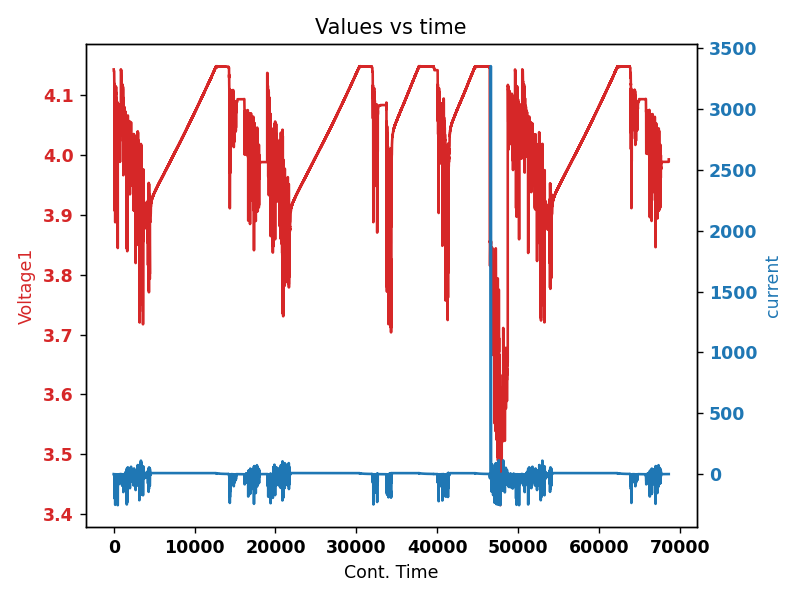

In [20]:
%matplotlib notebook
custom_plot.plot_dual_axis((df_connected_V1['counter'], "Cont. Time"), (df_connected_V1['V'], "Voltage1"), (df_connected_V1['current'], 'current'))

In [15]:
# Make dataset ready for LSTM
# [temporal input sequence] [output]
# example:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

### Univariate: use only voltage for LSTM model
1. An LSTM layer requires a three-dimensional input (#data_points, input time_steps, #variables)
2. LSTMs by default will produce a two-dimensional output  as an interpretation from the end of the sequence.
3. Consider running example a few times and compare the average outcome.

## Types of time series prediction
### A. Multiple input time series (mutlivariate time series)
1. Multiple variables over same TS, but prediction happens for one varaible
2. Example: Time series inputs: V, I, T 
   Output/prediction has to be made on V
4. Rephrase: how V changes with time wrt temporal values of V, I, T 

### B. Multiple parallel time series
1. There are several time series, each for separate variable
2. All the time series have same #time_steps
3. Data can be prepared in a way so that LSTM trains parallelly on each time series and predits on each variable (each column)
4. What if the parallel time serieses have different length i.e. variable total #time_steps?

### C. Multiple input-multiple parallel time series: multivariate and multiple parallel TS (A and B together)
1. Multiple time series samples, each TS being multivariate (this is the scenario)

In [16]:
df_votages = df_connected_V1['V1']
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df_votages, WINDOW_SIZE)
X1.shape, y1.shape



((49618, 5, 1), (49618,))

In [56]:
# split dataset into train, test, validation
X_train1, y_train1 = X1[:38000], y1[:38000]
X_val1, y_val1 = X1[38000:44000], y1[38000:44000]
X_test1, y_test1 = X1[44000:], y1[44000:]

X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((38000, 5, 1), (38000,), (6000, 5, 1), (6000,), (5618, 5, 1), (5618,))

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))   # each of 38000 training input are a 5*1 vector
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [58]:
# model 1
cp1 = ModelCheckpoint('model1/', save_best_only=True)         # save_best_only=true saves the best model with lowest validation loss
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [59]:
# measuers performance on every epoch on the validation dataset
# calls back checkpoint after every epoch and saves model if validation loss is lower than before
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1173/1188 [============================>.] - ETA: 0s - loss: 1.8434 - root_mean_squared_error: 1.3577

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1188/1188 [==============================] - 8s 5ms/step - loss: 1.8209 - root_mean_squared_error: 1.3494 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0453
Epoch 2/10
1185/1188 [============================>.] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0445

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1188/1188 [==============================] - 6s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0430
Epoch 3/10
1176/1188 [============================>.] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0432

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1188/1188 [==============================] - 6s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0415
Epoch 4/10
1170/1188 [============================>.] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0409

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1188/1188 [==============================] - 6s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0378
Epoch 5/10
1170/1188 [============================>.] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0369

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1188/1188 [==============================] - 6s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0368 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0364
Epoch 6/10
1175/1188 [============================>.] - ETA: 0s - loss: 9.3600e-04 - root_mean_squared_error: 0.0306

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1188/1188 [==============================] - 6s 5ms/step - loss: 9.3367e-04 - root_mean_squared_error: 0.0306 - val_loss: 8.0002e-04 - val_root_mean_squared_error: 0.0283
Epoch 7/10
1176/1188 [============================>.] - ETA: 0s - loss: 5.2076e-04 - root_mean_squared_error: 0.0228

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1188/1188 [==============================] - 6s 5ms/step - loss: 5.1947e-04 - root_mean_squared_error: 0.0228 - val_loss: 3.1488e-04 - val_root_mean_squared_error: 0.0177
Epoch 8/10
1178/1188 [============================>.] - ETA: 0s - loss: 3.0194e-04 - root_mean_squared_error: 0.0174

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1188/1188 [==============================] - 6s 5ms/step - loss: 3.0173e-04 - root_mean_squared_error: 0.0174 - val_loss: 2.3974e-04 - val_root_mean_squared_error: 0.0155
Epoch 9/10
1186/1188 [============================>.] - ETA: 0s - loss: 2.4048e-04 - root_mean_squared_error: 0.0155

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1188/1188 [==============================] - 6s 5ms/step - loss: 2.4047e-04 - root_mean_squared_error: 0.0155 - val_loss: 2.2891e-04 - val_root_mean_squared_error: 0.0151
Epoch 10/10
1188/1188 [==============================] - 3s 3ms/step - loss: 2.3268e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.5939e-04 - val_root_mean_squared_error: 0.0161


In [60]:
# load model with lowest validation loss
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [61]:
# prediction on training data
train_predictions = model1.predict(X_train1).flatten()   # flatten removes inner brackets in np array
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})   # dict: predicted: actual
train_results

Train Predictions  Actuals
0               4.137288   4.1400
1               4.136611   4.1400
2               4.136611   4.1400
3               4.136611   4.1401
4               4.136621   4.1400
...                  ...      ...
37995           4.143948   4.1476
37996           4.143847   4.1476
37997           4.143786   4.1478
37998           4.143812   4.1478
37999           4.143846   4.1479

[38000 rows x 2 columns]

In [25]:
%matplotlib notebook
# plt.plot(train_results['Train Predictions'][50:1000], 'b', label='Train Predictions')
# plt.plot(train_results['Actuals'][50:1000], 'r', label='Actuals')
plt.plot(train_results['Train Predictions'], 'b', label='Train Predictions')
plt.plot(train_results['Actuals'], 'r', label='Actuals')

NameError: name 'train_results' is not defined

In [65]:
# validation prediction
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

Val Predictions  Actuals
0            4.143853   4.1479
1            4.143915   4.1476
2            4.143950   4.1476
3            4.143921   4.1479
4            4.143913   4.1477
...               ...      ...
5995         4.123077   4.1257
5996         4.123063   4.1258
5997         4.123009   4.1257
5998         4.123027   4.1262
5999         4.123109   4.1260

[6000 rows x 2 columns]

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

<IPython.core.display.Javascript object>


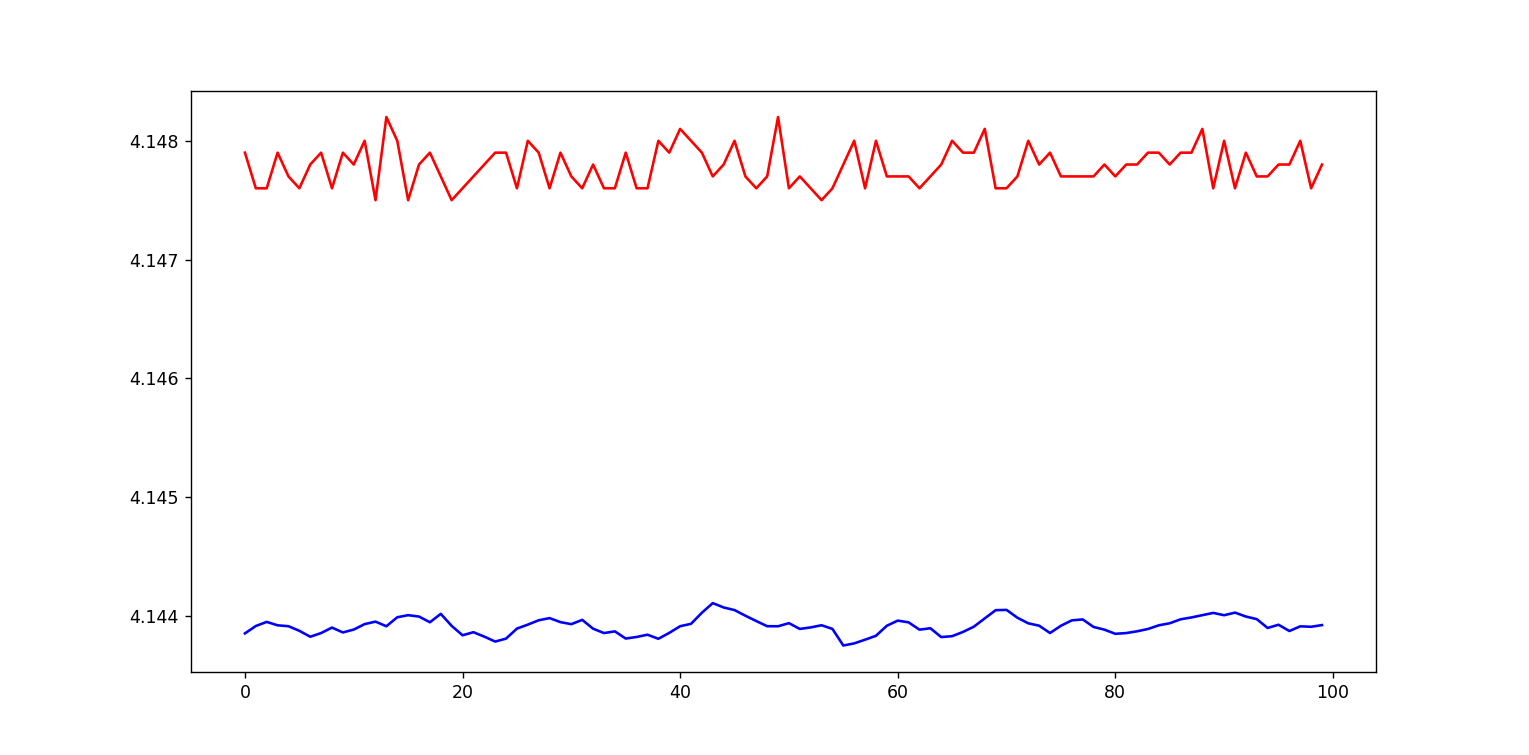

In [68]:
%matplotlib notebook
plt.plot(val_results['Val Predictions'][:100], 'b', label='Validation Predictions')
plt.plot(val_results['Actuals'][:100], 'r', label='Validation Actuals')

In [69]:
# test data was never seen by model
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

Test Predictions  Actuals
0             4.123289   4.1254
1             4.123293   4.1256
2             4.123262   4.1261
3             4.123292   4.1259
4             4.123216   4.1260
...                ...      ...
5613          4.083111   4.0836
5614          4.083121   4.0836
5615          4.083139   4.0836
5616          4.083160   4.0837
5617          4.083194   4.0837

[5618 rows x 2 columns]

<IPython.core.display.Javascript object>


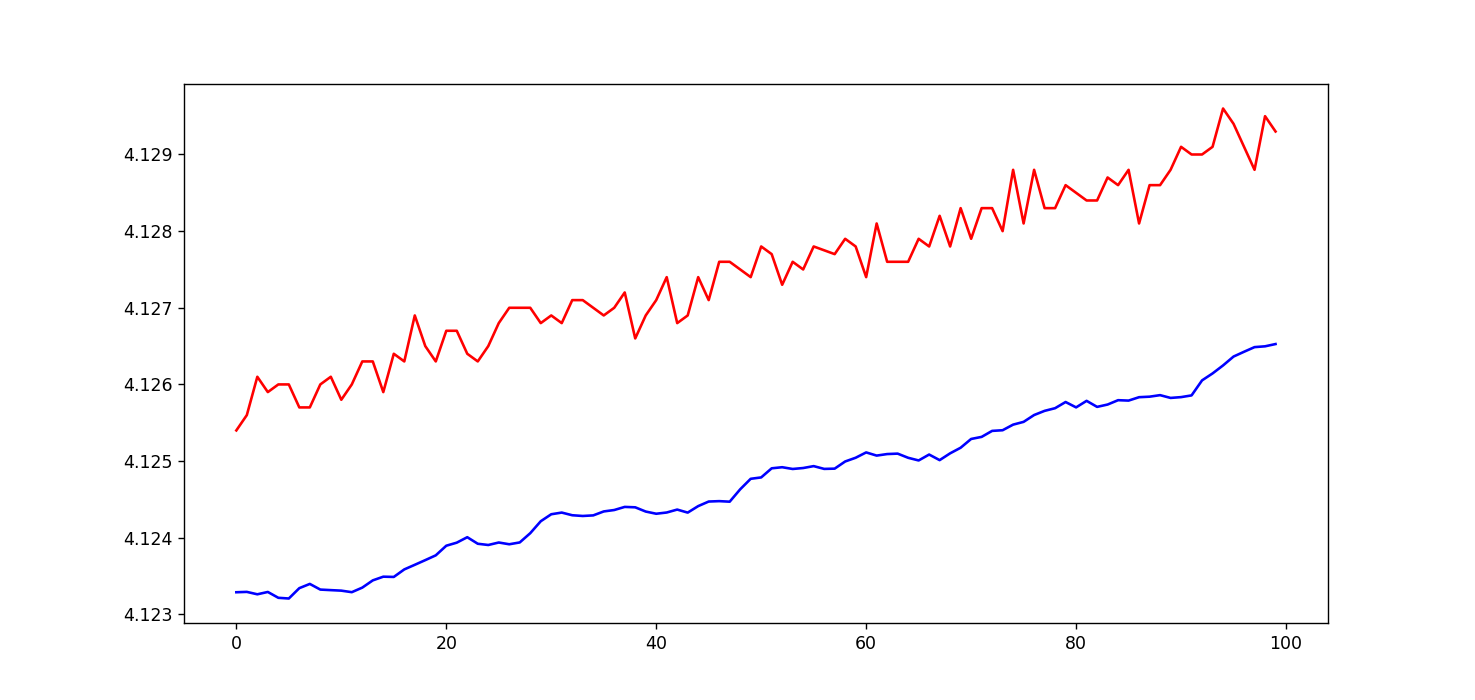

In [70]:
%matplotlib notebook
plt.plot(test_results['Test Predictions'][:100], 'b', label='Test Predictions')
plt.plot(test_results['Actuals'][:100], 'r', label='Test Actual')

### Multivariate: Use current, voltage, temperature (more variables can be added later)

Using time as variable: only relevant when seasonal properties/periodicity can be relevant

### Pre-processing: 
**Normalization vs Standardization**:
1. Normalization (MinMaxScalar) makes values between 0 and 1. If the maximum value is an outliar, it is not a good idea to use min max scalar becasue if the distribution is shrinked too narrow, min max scaling might affect the algorithm to treat outliars as more important 
2. Standardization makes mean=0 and standard deviation=1. If there are outliars, it is preserved in standardization ie it is still an outlier after processing

**Sparse data:**
This is when a lot of data in the dataset are meaningless/not significant i.e. zero (0) values. Centering sparse data i.e. using standard scaling would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. However, it can make sense to scale sparse inputs, especially if features are on different scales. If sparse data is present, then $with_mean=False$ can be used. Howver, for our data, sparsity does not exist so no need to worry about it.


In [19]:

cols = list(df_connected_V1)[1:4]    # column variables that are necessary for algo: voltage, current, mean temp
df_multivar_train = df_connected_V1[cols].astype(float)

print(df_multivar_train.head(5))
scaler = StandardScaler().fit(df_multivar_train)    # just fit, not transform yet
print(scaler)        # StandardScaler()

print('mean before standardization', scaler.mean_)     # mean
print('variance before standardization', scaler.scale_)    # variance

df_multivar_train_scaled = scaler.transform(df_multivar_train)

print('\nmean after standard scaling', df_multivar_train_scaled.mean(axis=0))     # mean, almost zero
print('standard deviation after standard scaling', df_multivar_train_scaled.std(axis=0))    # variance

# print(df_multivar_train_scaled[:20])   # This is a numpy array

# Make multivariate dataset ready for LSTM
# [temporal input sequence] [output]


# example:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def preprocess_time_sereis(df_as_np, input_window, output_window=1):
    X = []
    y = []
    for i in range(len(df_as_np) - input_window):
        X.append(df_as_np[i:i+input_window, 0:df_as_np.shape[1]])
#         print(df_as_np[i:i+input_window, 0:df_as_np.shape[1]])
        label = df_as_np[i+input_window][0]    # 0th index is voltage
        y.append(label)
    
    return np.array(X), np.array(y)

            V1  current  Temp_mean_module1
1096325  4.143      0.0               12.0
1096326  4.140      0.0               13.0
965787   4.140      0.0               13.0
965788   4.140      0.0               13.0
965789   4.140      0.0               13.0
StandardScaler()
mean before standardization [ 4.03478169 -3.00517905  9.57879915]
variance before standardization [ 0.11169335 27.3047484   2.1057379 ]

mean after standard scaling [ 2.68277385e-15 -4.00926921e-18 -2.86949125e-16]
standard deviation after standard scaling [1. 1. 1.]


In [20]:
output_window = 1    # how many values to predict/output label
input_window = 10    # map past 10 second values to the current output

print(df_multivar_train_scaled.shape)

X1, y1 = preprocess_time_sereis(df_multivar_train_scaled, input_window, output_window)
print(X1.shape, y1.shape)
# print(X1[1000:1005], y1[1000:1005])  # test

(49623, 3)
(49613, 10, 3) (49613,)


In [21]:
import math

# Train-validation-test split (60-20-20)
total_data_points = y1.shape[0]
train_total = math.floor(total_data_points * 0.6)
remaining = total_data_points - train_total
val_total = math.floor(remaining * 0.5)

X_train, y_train = X1[:train_total], y1[:train_total]
X_val, y_val = X1[train_total:train_total+val_total], y1[train_total:train_total+val_total]
X_test, y_test = X1[train_total+val_total:], y1[train_total+val_total:]
print(X_train.shape,y_train.shape)

(29767, 10, 3) (29767,)


In [24]:
print(X_train[0])
print(X_train[1])


[[0.96888774 0.11006068 1.14981112]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94292379 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]]
[[0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94292379 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]
 [0.94202849 0.11006068 1.62470403]]


In [ ]:
print(X_train[0])


In [130]:
# Build model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# The architecture of the model has to be optimized later
model_LSTM_mutivariate = Sequential()
model_LSTM_mutivariate.add(InputLayer((X_train.shape[1], X_train.shape[2])))   # input_window, #input_variables
model_LSTM_mutivariate.add(LSTM(64))
model_LSTM_mutivariate.add(Dense(8, 'relu'))      # relu: make negative inputs zero, good for backpropagation and gradient-based methods
model_LSTM_mutivariate.add(Dense(1, 'linear'))    # output layer

model_LSTM_mutivariate.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                17408     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [131]:
# model_LSTM_mutivariate
cp_LSTM_mutivariate = ModelCheckpoint('model_LSTM_mutivariate/', save_best_only=True)         # save_best_only=true saves the best model with lowest validation loss
model_LSTM_mutivariate.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

# Adam optimizer is better than classical stochastic gradient descent to update network weights iterative based in training data
# The loss function is used to optimize model. Here, MeanSquaredError function will get minimized by Adam optimizer
# Metric is used to judge the performance of model. This is only to look at and has nothing to do with the optimization process.

In [132]:
# measuers performance on every epoch on the validation dataset
# calls back checkpoint after every epoch and saves model if validation loss is lower than before

# stop if val_loss not improve in 2 iterations
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')

history = model_LSTM_mutivariate.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp_LSTM_mutivariate])

# The batch size is a number of samples processed before the model is updated.
# The number of epochs is the number of complete passes through the training dataset.

Epoch 1/10
922/931 [============================>.] - ETA: 0s - loss: 0.1222 - root_mean_squared_error: 0.3495

INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


931/931 [==============================] - 6s 6ms/step - loss: 0.1212 - root_mean_squared_error: 0.3481 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1513
Epoch 2/10
915/931 [============================>.] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1033

INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


931/931 [==============================] - 5s 6ms/step - loss: 0.0106 - root_mean_squared_error: 0.1032 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1185
Epoch 3/10
917/931 [============================>.] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.0903

INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


931/931 [==============================] - 6s 6ms/step - loss: 0.0082 - root_mean_squared_error: 0.0904 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088
Epoch 4/10
927/931 [============================>.] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.0845

INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


931/931 [==============================] - 5s 5ms/step - loss: 0.0071 - root_mean_squared_error: 0.0845 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1002
Epoch 5/10
926/931 [============================>.] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0802

INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


931/931 [==============================] - 5s 6ms/step - loss: 0.0064 - root_mean_squared_error: 0.0802 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0945
Epoch 6/10
917/931 [============================>.] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0773

INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


931/931 [==============================] - 6s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0773 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0920
Epoch 7/10
925/931 [============================>.] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0755

INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


931/931 [==============================] - 5s 5ms/step - loss: 0.0057 - root_mean_squared_error: 0.0754 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0915
Epoch 8/10
919/931 [============================>.] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0745

INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


931/931 [==============================] - 6s 6ms/step - loss: 0.0055 - root_mean_squared_error: 0.0743 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0884
Epoch 9/10
930/931 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0732

INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


931/931 [==============================] - 6s 6ms/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0883
Epoch 10/10
923/931 [============================>.] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0725

INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


INFO:tensorflow:Assets written to: model_LSTM_mutivariate\assets


931/931 [==============================] - 5s 6ms/step - loss: 0.0053 - root_mean_squared_error: 0.0725 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866


<IPython.core.display.Javascript object>


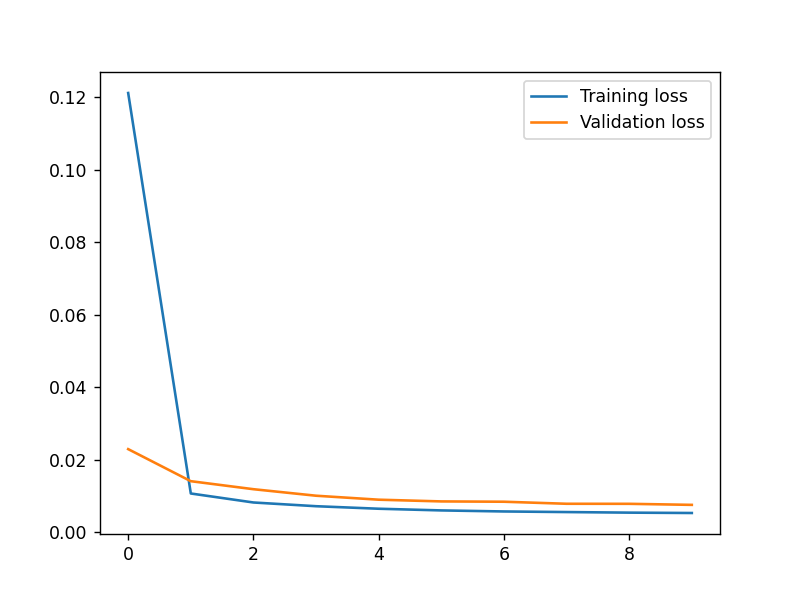

In [134]:
%matplotlib notebook
# plot train and val losss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [26]:
# load model with lowest validation loss
from tensorflow.keras.models import load_model
model_LSTM_mutivariate = load_model('model_LSTM_mutivariate/')

In [27]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X)    #shape = (n, 1) where n= X.shape[0] eg number of data points
    
    # Perform inverse transformation to rescale back to original range
    # Since we used 3 variables for transform, the inverse expects same dimensions
    # Therefore, copy same values 3 times and discard them after inverse transform
    prediction_copies = np.repeat(predictions, X.shape[2], axis=1)   # X.shape[2] is number of variables
    y_pred = scaler.inverse_transform(prediction_copies)[:,0]

    # print(y.shape)   # shape is (n,) e.g. 1D array
    y_actual = np.reshape(y, (y.shape[0], 1))    # make it 2D
    print(y_actual.shape)
    # reverse transform for actuals
    actual_copies = np.repeat(y_actual, X.shape[2], axis=1)   # X.shape[2] is number of variables
    y_actual = scaler.inverse_transform(actual_copies)[:,0]

    df = pd.DataFrame(data={'Predictions':y_pred, 'Actuals':y_actual})
    df_temp = pd.DataFrame()
    df_temp['counter'] = range(len(y))   # x axis for plot
    custom_plot.plot_dual_axis((df_temp['counter'], "Time"), (df['Predictions'][start:end], "Predicted voltage"), (df['Actuals'], "Actual voltage"))
    print("MSE: ", mse(y, predictions))
    print("RMSE: ", mse(y, predictions, squared=False))
    print("MAE: ", mae(y, predictions))
    print("MAPE: ", mape(y, predictions))

(29767, 1)


<IPython.core.display.Javascript object>


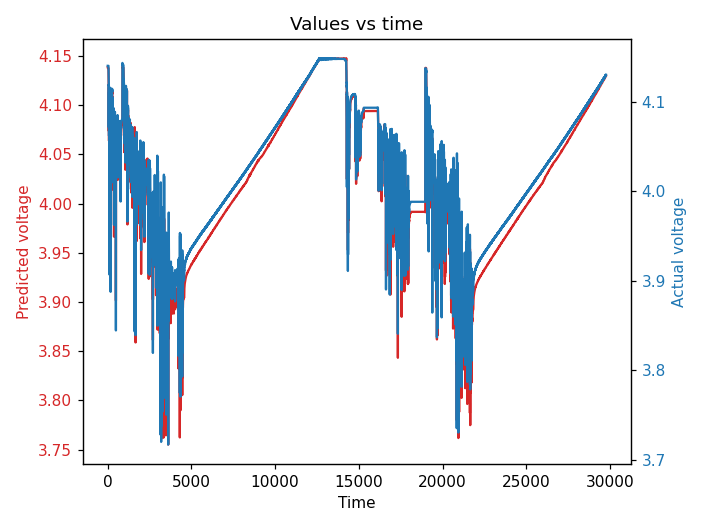

MSE:  0.005550639592784773
RMSE:  0.07450261467079376
MAE:  0.02807998622449949
MAPE:  0.16605621088365238
(9923, 1)


<IPython.core.display.Javascript object>


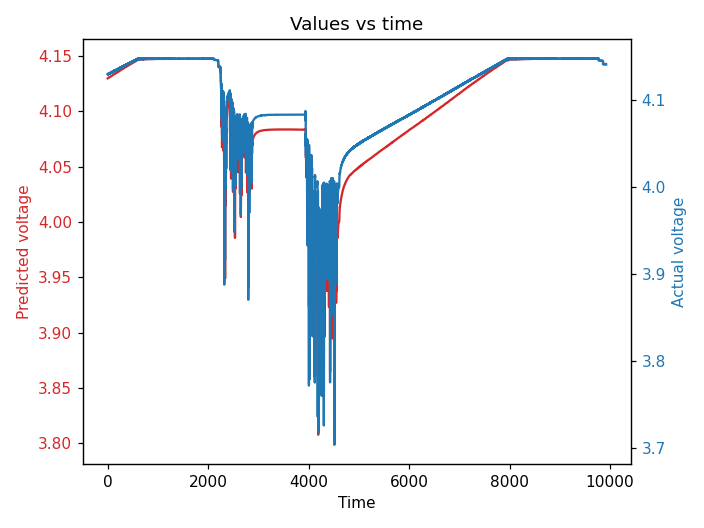

MSE:  0.0075079952002051285
RMSE:  0.08664868839287257
MAE:  0.018814740711785086
MAPE:  0.09230236292437387
(9923, 1)


<IPython.core.display.Javascript object>


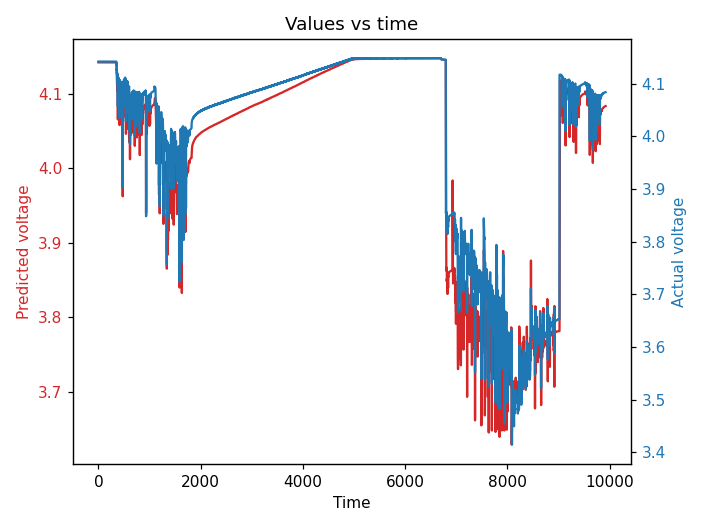

MSE:  0.27355820950535215
RMSE:  0.5230279242118456
MAE:  0.23272411277359303
MAPE:  0.38473911764893476


In [28]:
%matplotlib notebook

# scale 
plot_predictions1(model_LSTM_mutivariate, X_train, y_train, start=0, end=y_train.shape[0])  # prediction on training data
plot_predictions1(model_LSTM_mutivariate, X_val, y_val, start=0, end=y_train.shape[0])  # prediction on val data
plot_predictions1(model_LSTM_mutivariate, X_test, y_test, start=0, end=y_train.shape[0])  # prediction on test data

In [58]:
# Forecasting
# Apply rolling to foerrecast, the idea here: https://tsfresh.readthedocs.io/en/latest/text/forecasting.html
# Take a single data point and predict for that point, replace next actual data point with the predicted value, and move forward

# As prediction has to be done for each element, take the first data point
# np_input[0].reshape(np_input, (np_input[0].shape[0], 1))

def get_forecast_list(np_input, num_forecast, freeze=False):
    NUM_INPUT_VARS = np_input.shape[2]
    FREEZE_DURATION = 15*60    # how many seconds we want to freeze (ex 15 minutes)
    np_input_copy = np.empty((num_forecast, input_window, NUM_INPUT_VARS), float)

    for i in range(num_forecast):
        np_input_copy[i] = np_input[i]      # fill with actual values

    li_predicted = []
    # predict and append
    for i in range(num_forecast):
        pred_ID = i + input_window    # nth prediction
        # single_input empty array is necessary because LSTM prediction takes input in (num_datapoints, input_window, num_variables) format 
        single_input = np.empty((1, input_window, NUM_INPUT_VARS), float)

        # whereas np_input[0] is in (input_window, num_variables) format
        single_input[0] = np_input[i]
    #     single_input_last_index = single_input.shape[1] - 1      # index where voltage needs to be replaced with predictions
    #     print('single_input_last_index: ', single_input_last_index)
        if(len(li_predicted) > 0):
            # print('li_predicted: ', li_predicted)
            for j in range(1, len(li_predicted)+1):
                if(j <= input_window):           # max 10 values to replace as window size is 10
                    _, single_input[0][-j][0] = li_predicted[-j]  # replace from last to first

        predictions = model_LSTM_mutivariate.predict(single_input).flatten()    # flatten returns 1D array
        li_predicted.append((pred_ID, predictions[0]))   # tuple of (id, predicted_value)

    li_rolling_predictoins = []
    for time_id,predict_val in li_predicted:
        li_rolling_predictoins.append(predict_val)        

    # Current freezing
    if(freeze):
        # num_input_samples = np_input.shape[0]
        freeze_start_index = num_forecast - FREEZE_DURATION
        for i in range(freeze_start_index, num_forecast):
            for j in range(input_window):
                np_input_copy[i][j][1] = 0       # asisgn current = 0
        return np_input_copy, li_rolling_predictoins
    else:
        return li_rolling_predictoins


In [38]:
# print(list_predicted)
li_train_forecast = get_forecast_list(X_train, 900)           # 15 minute forecast
np_train_forecast = np.array(li_train_forecast)

li_val_forecast = get_forecast_list(X_val, 900)
np_val_forecast = np.array(li_val_forecast)

li_test_forecast = get_forecast_list(X_test, 900)
np_test_forecast = np.array(li_test_forecast)

(900, 1)


<IPython.core.display.Javascript object>


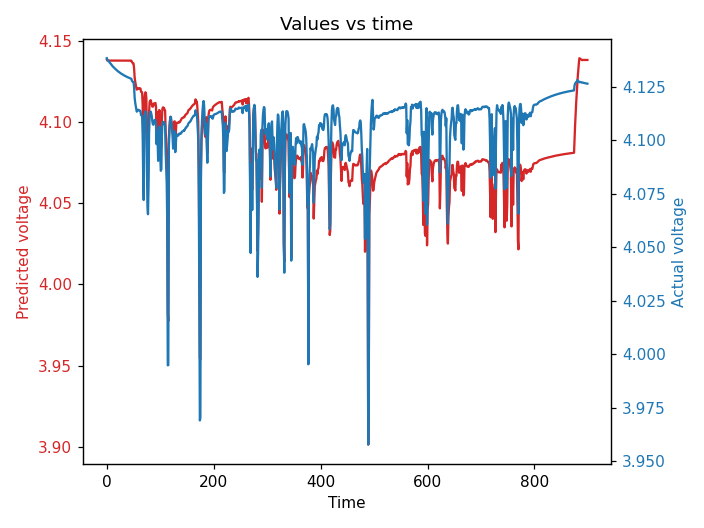

MSE:  0.06829942
RMSE:  0.26134157
MAE:  0.21990183
MAPE:  0.37917358
(900, 1)


<IPython.core.display.Javascript object>


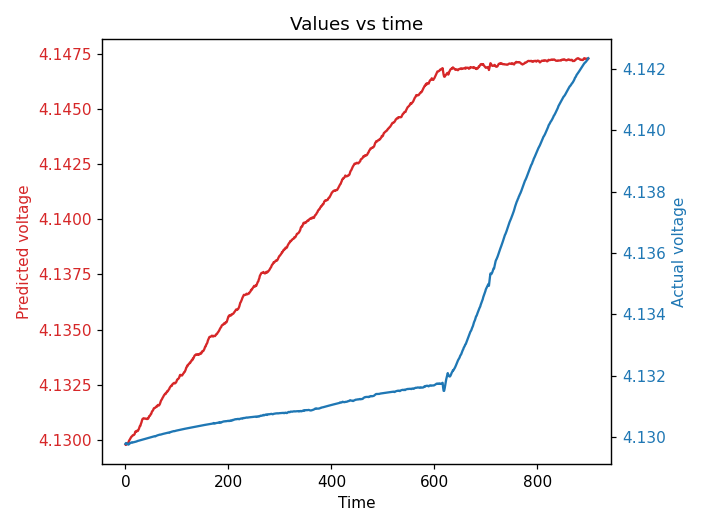

MSE:  0.006988317
RMSE:  0.083596155
MAE:  0.07475703
MAPE:  0.08510988
(900, 1)


<IPython.core.display.Javascript object>


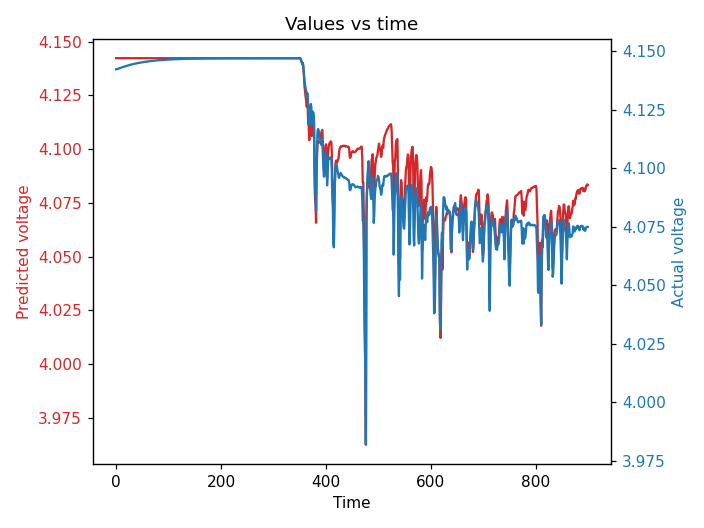

MSE:  0.0038067787
RMSE:  0.0616991
MAE:  0.052464508
MAPE:  0.1444296


In [40]:
%matplotlib notebook

# Example: take first 900 values
plot_predictions1(model_LSTM_mutivariate, X_train[:900], np_train_forecast, start=0, end=y_train.shape[0])  # rolling forecast on training data
plot_predictions1(model_LSTM_mutivariate, X_val[:900], np_val_forecast, start=0, end=y_train.shape[0])  # rolling forecast on val data
plot_predictions1(model_LSTM_mutivariate, X_test[:900], np_test_forecast, start=0, end=y_train.shape[0])  # rolling forecast on test data

In [59]:
# Test current freezing
forecast_sec = 2*3600
np_frozen_input, li_forecast_freeze = get_forecast_list(X_test, forecast_sec, True)           # 2 hour forecast
np_test_forecast_freeze = np.array(li_forecast_freeze)

(7200, 1)


<IPython.core.display.Javascript object>


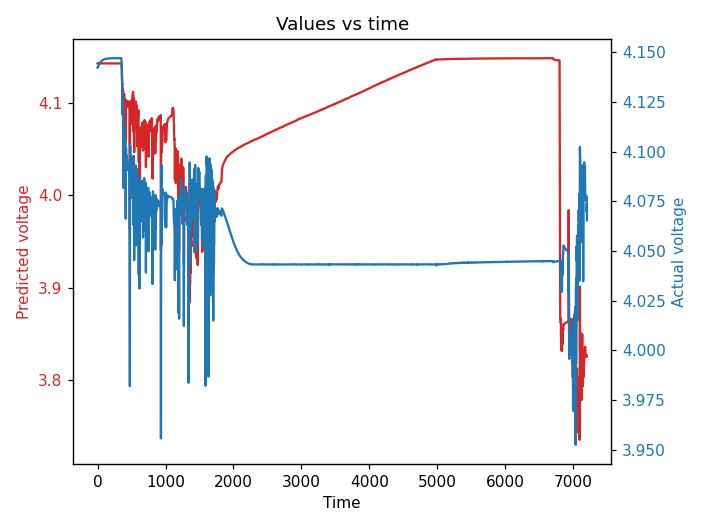

MSE:  0.61308336
RMSE:  0.7829964
MAE:  0.6287564
MAPE:  8.592644


In [60]:
%matplotlib notebook

# test forecast with input freezing
plot_predictions1(model_LSTM_mutivariate, np_frozen_input[:forecast_sec], np_test_forecast_freeze, start=0, end=forecast_sec)  # rolling forecast on test data

## predict with 1D convolution

In [187]:
model_conv = Sequential()
model_conv.add(InputLayer((X_train.shape[1], X_train.shape[2])))
model_conv.add(Conv1D(64, kernel_size=2))
model_conv.add(Flatten())
model_conv.add(Dense(8, 'relu'))
model_conv.add(Dense(1, 'linear'))

model_conv.summary()

cp_conv = ModelCheckpoint('model_conv/', save_best_only=True)
model_conv.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 9, 64)             448       
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_20 (Dense)            (None, 8)                 4616      
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 5,073
Trainable params: 5,073
Non-trainable params: 0
_________________________________________________________________


In [188]:
history_conv = model_conv.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp_conv])

Epoch 1/20
872/931 [===========================>..] - ETA: 0s - loss: 0.0548 - root_mean_squared_error: 0.2340INFO:tensorflow:Assets written to: model_conv\assets


INFO:tensorflow:Assets written to: model_conv\assets


931/931 [==============================] - 2s 2ms/step - loss: 0.0519 - root_mean_squared_error: 0.2278 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1113
Epoch 2/20
914/931 [============================>.] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.0914INFO:tensorflow:Assets written to: model_conv\assets


INFO:tensorflow:Assets written to: model_conv\assets


931/931 [==============================] - 1s 1ms/step - loss: 0.0084 - root_mean_squared_error: 0.0919 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0969
Epoch 3/20
923/931 [============================>.] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0809INFO:tensorflow:Assets written to: model_conv\assets


INFO:tensorflow:Assets written to: model_conv\assets


931/931 [==============================] - 1s 1ms/step - loss: 0.0065 - root_mean_squared_error: 0.0809 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0919
Epoch 4/20
899/931 [===========================>..] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0821INFO:tensorflow:Assets written to: model_conv\assets


INFO:tensorflow:Assets written to: model_conv\assets


931/931 [==============================] - 1s 1ms/step - loss: 0.0069 - root_mean_squared_error: 0.0828 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0894
Epoch 5/20
880/931 [===========================>..] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0771INFO:tensorflow:Assets written to: model_conv\assets


INFO:tensorflow:Assets written to: model_conv\assets


931/931 [==============================] - 1s 2ms/step - loss: 0.0060 - root_mean_squared_error: 0.0775 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0880
Epoch 6/20
911/931 [============================>.] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0822INFO:tensorflow:Assets written to: model_conv\assets


INFO:tensorflow:Assets written to: model_conv\assets


931/931 [==============================] - 1s 1ms/step - loss: 0.0067 - root_mean_squared_error: 0.0819 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 7/20
931/931 [==============================] - 1s 1ms/step - loss: 0.0057 - root_mean_squared_error: 0.0752 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0876
Epoch 8/20
928/931 [============================>.] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0758INFO:tensorflow:Assets written to: model_conv\assets


INFO:tensorflow:Assets written to: model_conv\assets


931/931 [==============================] - 1s 1ms/step - loss: 0.0058 - root_mean_squared_error: 0.0759 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0856
Epoch 9/20
931/931 [==============================] - 1s 1ms/step - loss: 0.0077 - root_mean_squared_error: 0.0878 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0863
Epoch 10/20
931/931 [==============================] - 1s 1ms/step - loss: 0.0055 - root_mean_squared_error: 0.0739 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0863
Epoch 11/20
894/931 [===========================>..] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0782INFO:tensorflow:Assets written to: model_conv\assets


INFO:tensorflow:Assets written to: model_conv\assets


931/931 [==============================] - 1s 1ms/step - loss: 0.0060 - root_mean_squared_error: 0.0773 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853
Epoch 12/20
883/931 [===========================>..] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0774INFO:tensorflow:Assets written to: model_conv\assets


INFO:tensorflow:Assets written to: model_conv\assets


931/931 [==============================] - 1s 1ms/step - loss: 0.0061 - root_mean_squared_error: 0.0781 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0845
Epoch 13/20
931/931 [==============================] - 1s 1ms/step - loss: 0.0056 - root_mean_squared_error: 0.0751 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0845
Epoch 14/20
931/931 [==============================] - 1s 984us/step - loss: 0.0061 - root_mean_squared_error: 0.0783 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0847
Epoch 15/20
919/931 [============================>.] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0759INFO:tensorflow:Assets written to: model_conv\assets


INFO:tensorflow:Assets written to: model_conv\assets


931/931 [==============================] - 1s 1ms/step - loss: 0.0058 - root_mean_squared_error: 0.0761 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0841
Epoch 16/20
931/931 [==============================] - 1s 1ms/step - loss: 0.0056 - root_mean_squared_error: 0.0752 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0850
Epoch 17/20
931/931 [==============================] - 1s 1ms/step - loss: 0.0059 - root_mean_squared_error: 0.0770 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0844
Epoch 18/20
931/931 [==============================] - 1s 1ms/step - loss: 0.0059 - root_mean_squared_error: 0.0770 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0847
Epoch 19/20
931/931 [==============================] - 1s 1ms/step - loss: 0.0056 - root_mean_squared_error: 0.0747 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0845
Epoch 20/20
931/931 [==============================] - 1s 1ms/step - loss: 0.0069 - root_mean_squared_error: 0.0828 - val_loss: 0.0074 - val_root_m

<IPython.core.display.Javascript object>


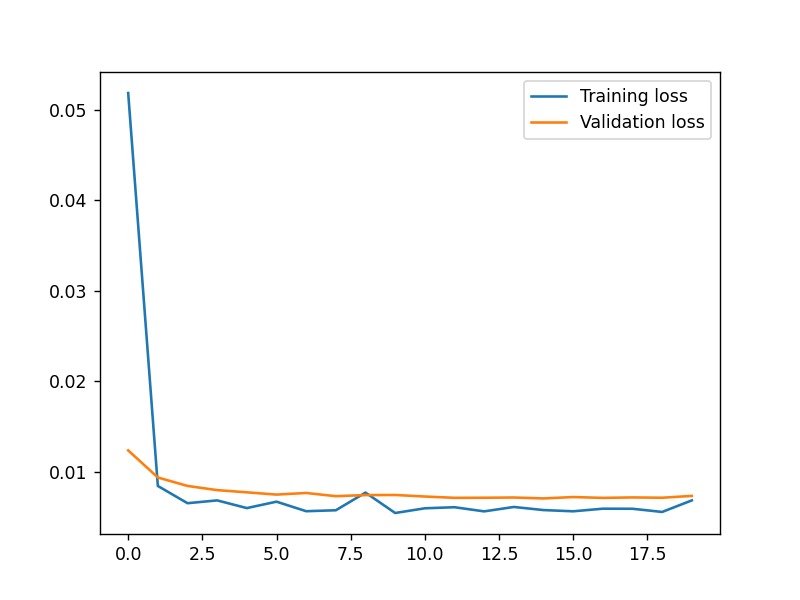

In [189]:
%matplotlib notebook
# plot train and val losss
plt.plot(history_conv.history['loss'], label='Training loss')
plt.plot(history_conv.history['val_loss'], label='Validation loss')
plt.legend()

In [190]:
# load model with lowest validation loss
from tensorflow.keras.models import load_model
model_conv = load_model('model_conv/')

(29767, 1)


<IPython.core.display.Javascript object>


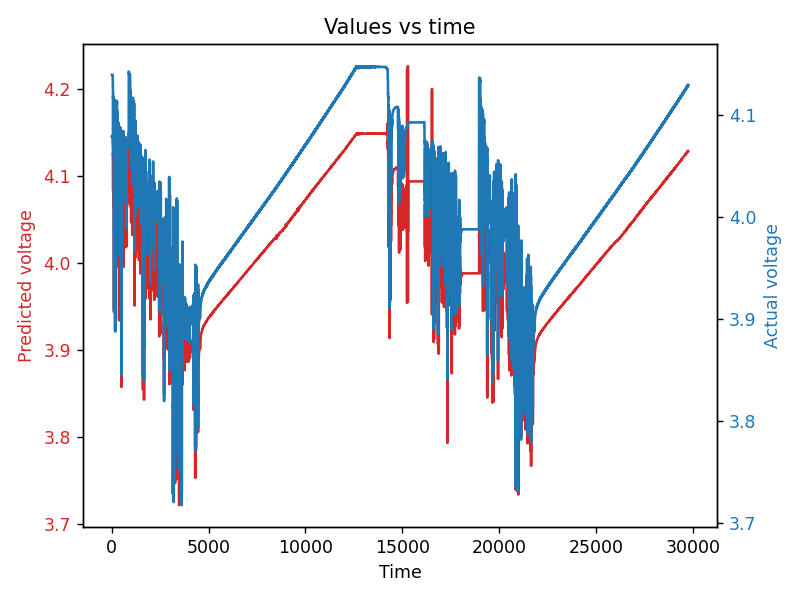

Mean squared error:  0.005293418688104565
(9923, 1)


<IPython.core.display.Javascript object>


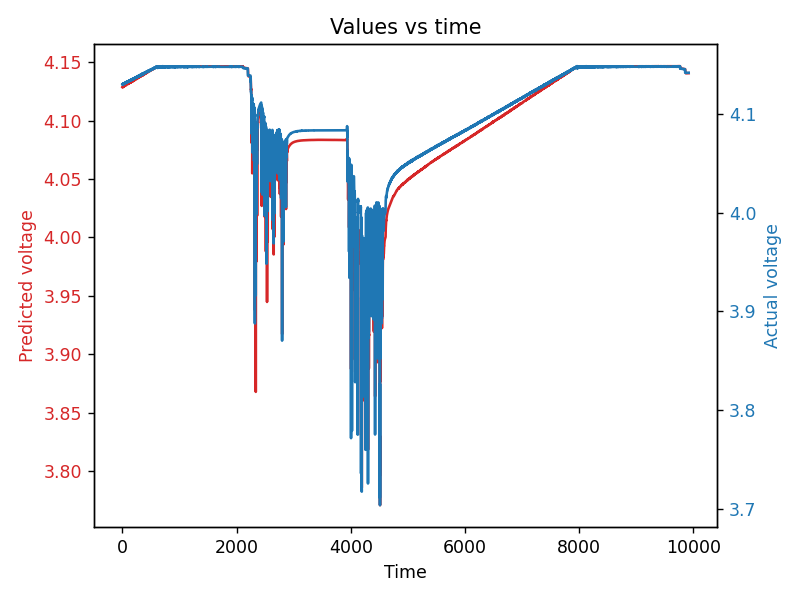

Mean squared error:  0.007070513882651092
(9923, 1)


<IPython.core.display.Javascript object>


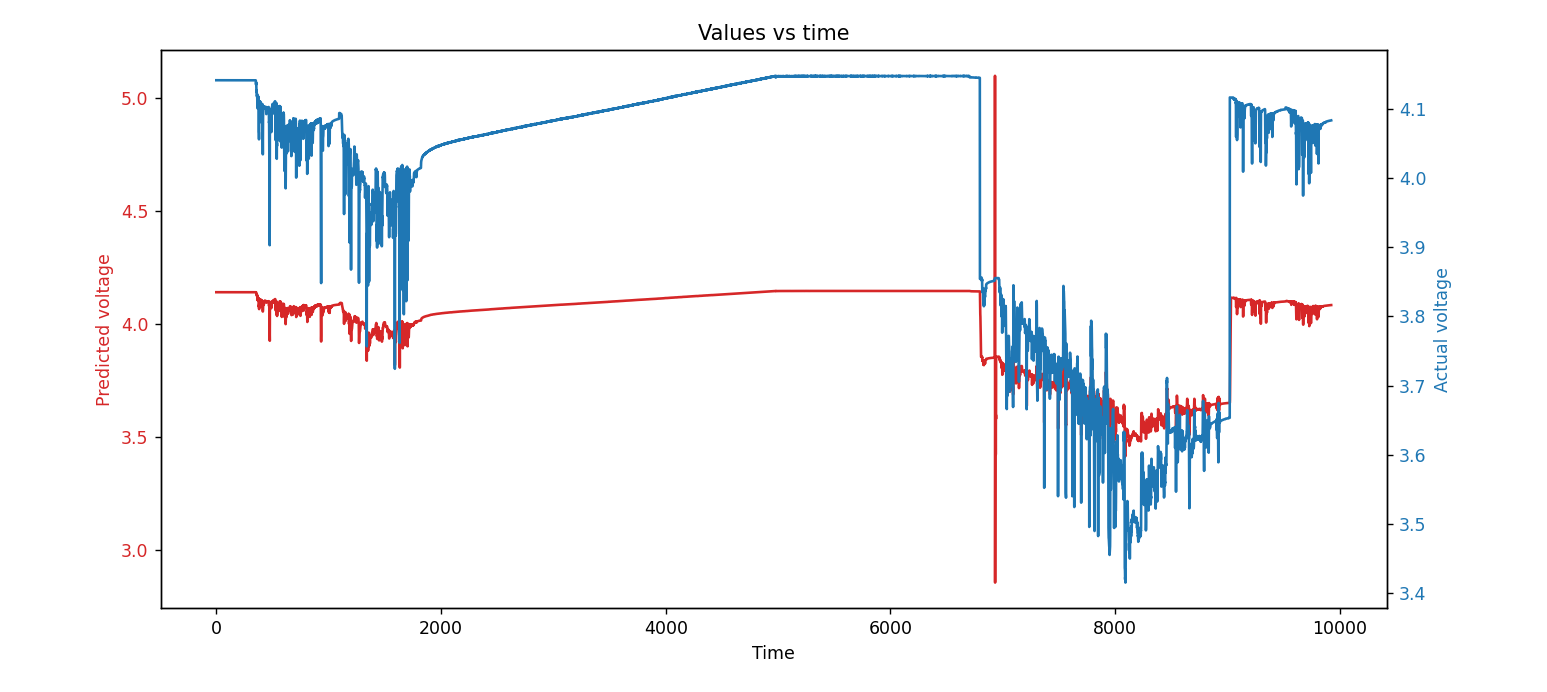

Mean squared error:  0.04589616182537113


In [191]:
%matplotlib notebook

# scale 
plot_predictions1(model_conv, X_train, y_train, start=0, end=y_train.shape[0])  # prediction on training data
plot_predictions1(model_conv, X_val, y_val, start=0, end=y_train.shape[0])  # prediction on val data
plot_predictions1(model_conv, X_test, y_test, start=0, end=y_train.shape[0])  # prediction on test data

## GRU model

In [192]:
model_GRU = Sequential()
model_GRU.add(InputLayer((X_train.shape[1], X_train.shape[2])))
model_GRU.add(GRU(64))
model_GRU.add(Dense(8, 'relu'))
model_GRU.add(Dense(1, 'linear'))
model_GRU.summary()

cp_GRU = ModelCheckpoint('model_GRU/', save_best_only=True)
model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                13248     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,777
Trainable params: 13,777
Non-trainable params: 0
_________________________________________________________________


In [193]:
history_GRU = model_GRU.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp_GRU])

Epoch 1/10
920/931 [============================>.] - ETA: 0s - loss: 0.0862 - root_mean_squared_error: 0.2936

INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


931/931 [==============================] - 7s 6ms/step - loss: 0.0853 - root_mean_squared_error: 0.2921 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1080
Epoch 2/10
926/931 [============================>.] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0808

INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


931/931 [==============================] - 5s 5ms/step - loss: 0.0065 - root_mean_squared_error: 0.0807 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0914
Epoch 3/10
931/931 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0753

INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


931/931 [==============================] - 5s 6ms/step - loss: 0.0057 - root_mean_squared_error: 0.0753 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0890
Epoch 4/10
925/931 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0736

INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


931/931 [==============================] - 5s 6ms/step - loss: 0.0054 - root_mean_squared_error: 0.0735 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0862
Epoch 5/10
919/931 [============================>.] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0724

INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


931/931 [==============================] - 5s 6ms/step - loss: 0.0052 - root_mean_squared_error: 0.0723 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0855
Epoch 6/10
931/931 [==============================] - 4s 4ms/step - loss: 0.0051 - root_mean_squared_error: 0.0717 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 7/10
918/931 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0710

INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


931/931 [==============================] - 5s 5ms/step - loss: 0.0051 - root_mean_squared_error: 0.0712 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0851
Epoch 8/10
925/931 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0708

INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


931/931 [==============================] - 5s 5ms/step - loss: 0.0050 - root_mean_squared_error: 0.0707 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0845
Epoch 9/10
915/931 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0705

INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


931/931 [==============================] - 5s 5ms/step - loss: 0.0050 - root_mean_squared_error: 0.0704 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0844
Epoch 10/10
925/931 [============================>.] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0702

INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


931/931 [==============================] - 6s 6ms/step - loss: 0.0049 - root_mean_squared_error: 0.0701 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0838


<IPython.core.display.Javascript object>


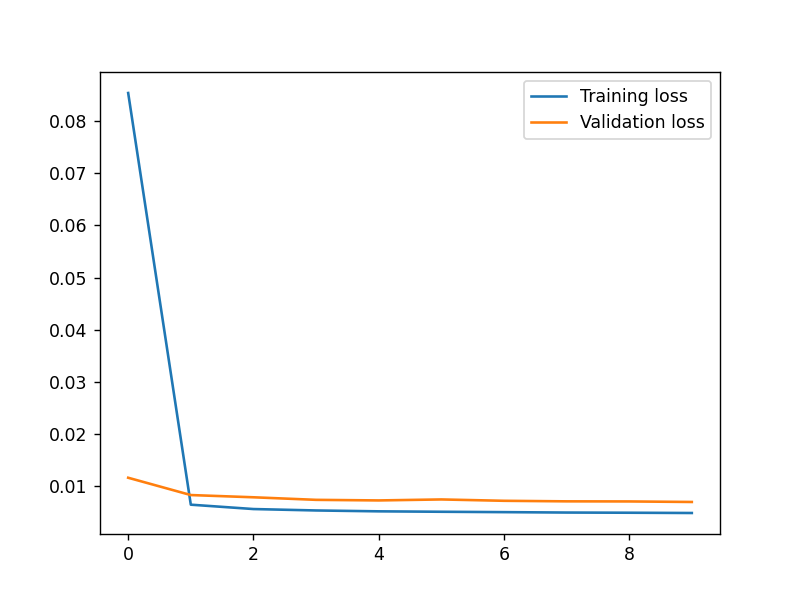

In [194]:
%matplotlib notebook
# plot train and val losss
plt.plot(history_GRU.history['loss'], label='Training loss')
plt.plot(history_GRU.history['val_loss'], label='Validation loss')
plt.legend()

In [196]:
# load model with lowest validation loss
from tensorflow.keras.models import load_model
model_GRU = load_model('model_GRU/')

(29767, 1)


<IPython.core.display.Javascript object>


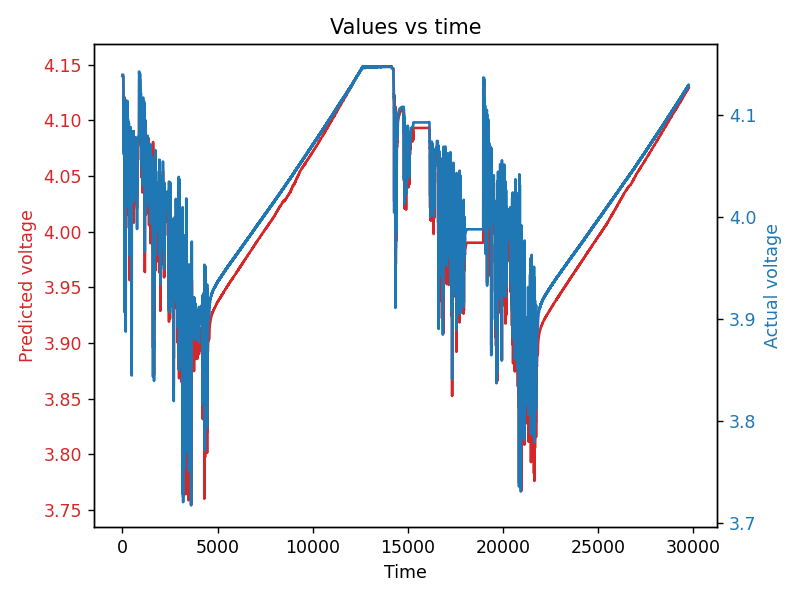

Mean squared error:  0.004961927294454731
(9923, 1)


<IPython.core.display.Javascript object>


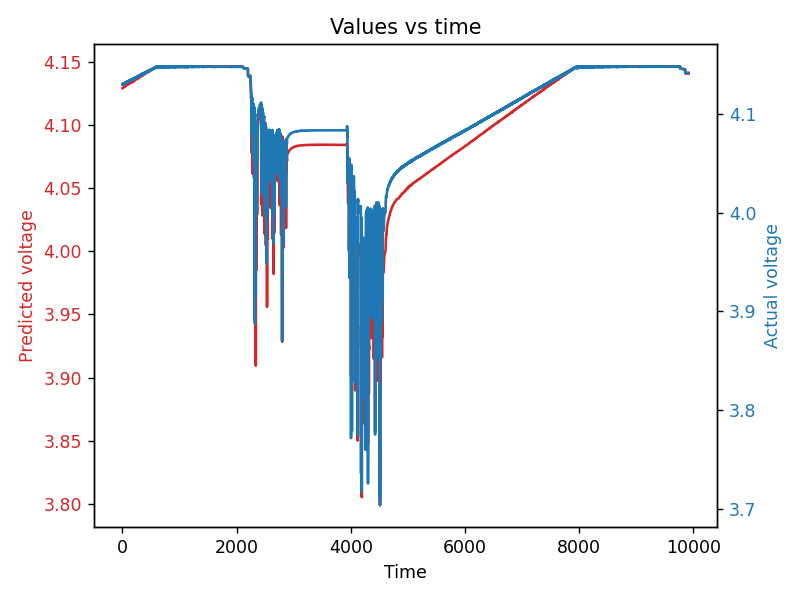

Mean squared error:  0.0070223856760246815
(9923, 1)


<IPython.core.display.Javascript object>


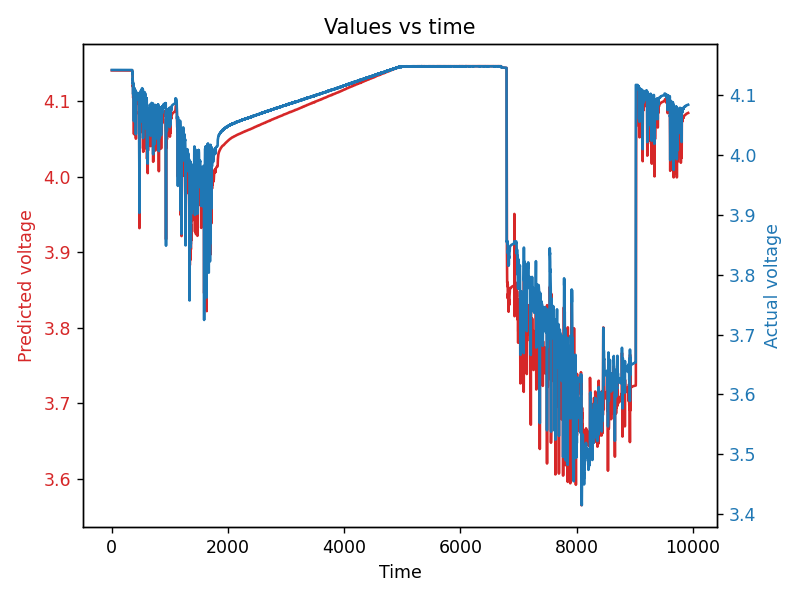

Mean squared error:  0.1267739471022983


In [197]:
%matplotlib notebook

# scale 
plot_predictions1(model_GRU, X_train, y_train, start=0, end=y_train.shape[0])  # prediction on training data
plot_predictions1(model_GRU, X_val, y_val, start=0, end=y_train.shape[0])  # prediction on val data
plot_predictions1(model_GRU, X_test, y_test, start=0, end=y_train.shape[0])  # prediction on test data

## LSTM with 

In [ ]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

In [ ]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

In [ ]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])